# Compare vaccination strategies. $e$=0.7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import datetime
from experiments import get_experiments_results
from env_var import EPIDEMIC, MAPPINGS, EXPERIMENTS

mpl.rcParams['figure.dpi']= 175
plt.style.use('ggplot')

In [2]:
# Simulation parameters
num_age_groups = EXPERIMENTS['num_age_groups']
num_ervas = EXPERIMENTS['num_ervas']
T = EXPERIMENTS['simulate_T']
init_vacc = EXPERIMENTS['init_vacc']
u = EXPERIMENTS['vaccines_per_day']
r_experiments = EXPERIMENTS['r_effs']
t0 = EXPERIMENTS['t0']
e = EPIDEMIC['e']
strategies = EXPERIMENTS['strategies']

# Plot parameters
plot_interval = 15
ervas_labels = EPIDEMIC['ervas_order']
age_labels = MAPPINGS['age_groups'][num_age_groups]['names']

In [3]:
all_results = get_experiments_results(num_age_groups=num_age_groups,
                                      num_ervas=num_ervas,
                                      init_vacc=init_vacc,
                                      strategies=strategies,
                                      u=u,
                                      T=T,
                                      r_experiments=r_experiments,
                                      t0=t0,
                                      e=e)

Beginning experiments.
Parameters:
Number of age ervas: 5.
Number of age groups: 9.
Number of vaccines per day: 30000.
rho: 43.05350174321637.
t0: 2021-04-18.
T: 115.
Vaccine efficacy (e): 0.7.
Rs to try: [1.0, 1.25, 1.5, 2.0].
Initialize with vaccinated people: True.
Strategies:
[([1, 0, 0], 'Pop only'), ([0, 0, 0], 'No vaccination'), ([0.3333333333333333, 0.3333333333333333, 0.3333333333333333], 'Pop, Inf and Hosp'), ([0.5, 0, 0.5], 'Pop and Hosp'), ([0.5, 0.5, 0], 'Pop and Inf'), ([0, 0.5, 0.5], 'Hosp and Inf'), ([0, 0, 1], 'Hosp only'), ([0, 1, 0], 'Inf only')].

Finished R: 1.0. Beta: 0.02322691440905995 1/4. Policy: Pop only. 1/8
Finished R: 1.0. Beta: 0.02322691440905995 1/4. Policy: No vaccination. 2/8
Finished R: 1.0. Beta: 0.02322691440905995 1/4. Policy: Pop, Inf and Hosp. 3/8
Finished R: 1.0. Beta: 0.02322691440905995 1/4. Policy: Pop and Hosp. 4/8
Finished R: 1.0. Beta: 0.02322691440905995 1/4. Policy: Pop and Inf. 5/8
Finished R: 1.0. Beta: 0.02322691440905995 1/4. Policy

In [4]:
def plot_results(ax, r, metric, all_results, t0, T, skip_no_vacc=True):
    begin = datetime.datetime.strptime(t0, '%Y-%m-%d')
    x = [begin + datetime.timedelta(days=day) for day in range(T)]

    results_for_r = all_results[r]
    totals = []
    for label, results_all_metrics in results_for_r:
        if label == 'No vaccination' and skip_no_vacc:
            continue
        metric_results = results_all_metrics[metric]
        metric_all_time = metric_results.sum(axis=0)
        metric_all_time = metric_all_time.sum(axis=0)
        
        assert metric_all_time.shape[0] == T
        
        ax.plot(x, metric_all_time, label=label)
        if metric == 'deaths':
            total_policy = metric_all_time[-1]
        else:
            total_policy = metric_all_time.sum(axis=0)
        total = (label, total_policy)
        totals.append(total)
        
    sorted_totals = sorted(totals, key=lambda x: x[-1])
    for total in sorted_totals:
        print('%s: %s' % (total[0], total[1]))
        
    ax.set_xlabel('Date')
    ax.set_ylabel('Number of %s.' % (metric, ))
    ax.set_title('Number of %s per policy. R=%s' % (metric, r))
    ax.legend()
        
    return ax

# Deaths

Pop, Inf and Hosp: 139.2375956065024
Pop and Inf: 139.3001674106191
Inf only: 139.37402545300887
Hosp and Inf: 139.40648441931145
Pop and Hosp: 139.4882582476913
Hosp only: 139.5477144952952
Pop only: 140.5024351913601


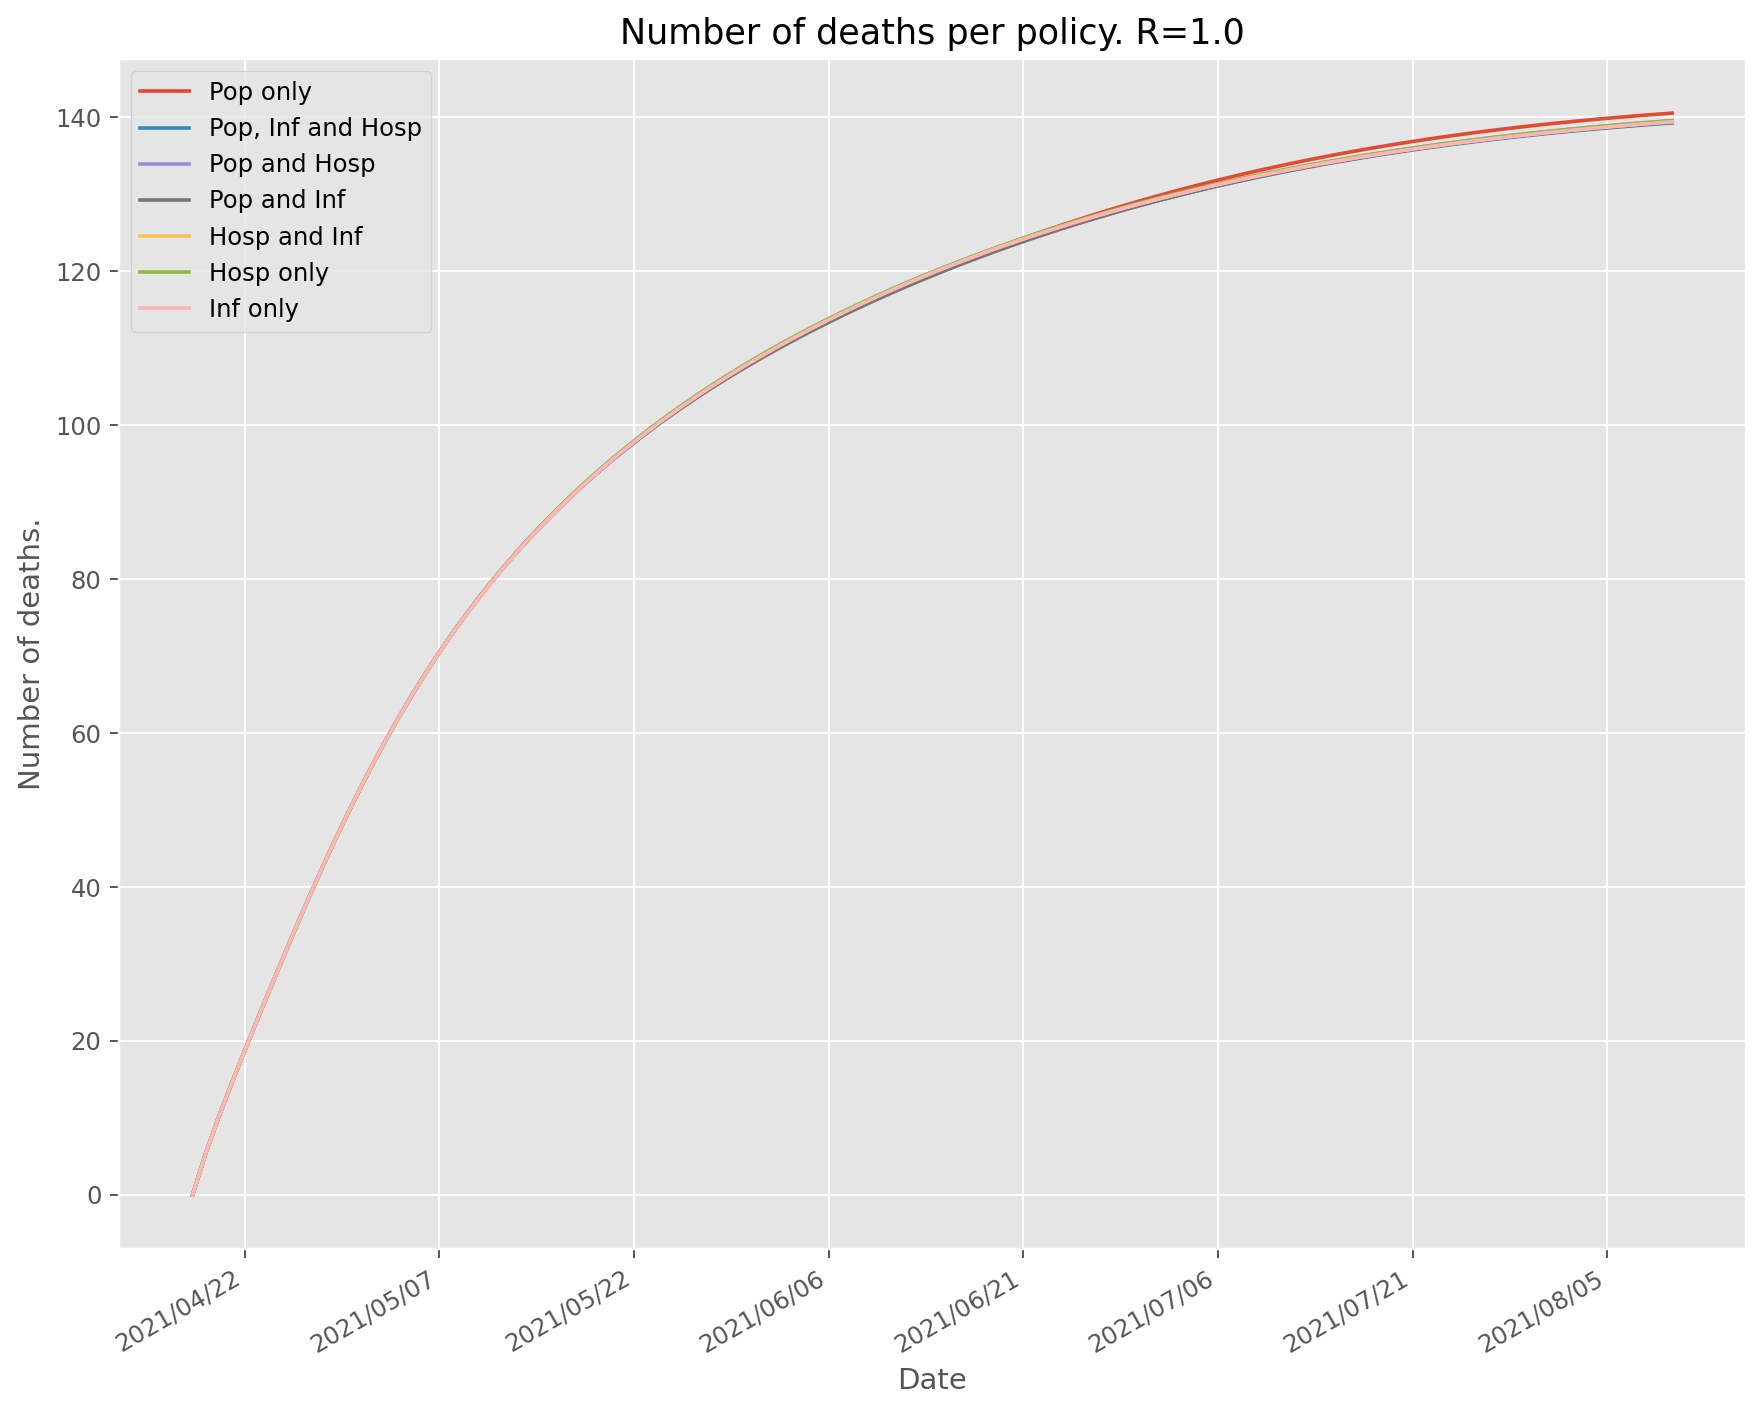

In [5]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop, Inf and Hosp: 347.570470763066
Pop and Inf: 347.6181012770981
Pop and Hosp: 348.4411084149055
Inf only: 348.9858470856
Hosp and Inf: 349.1338965155794
Hosp only: 349.57571933140974
Pop only: 353.687731564432


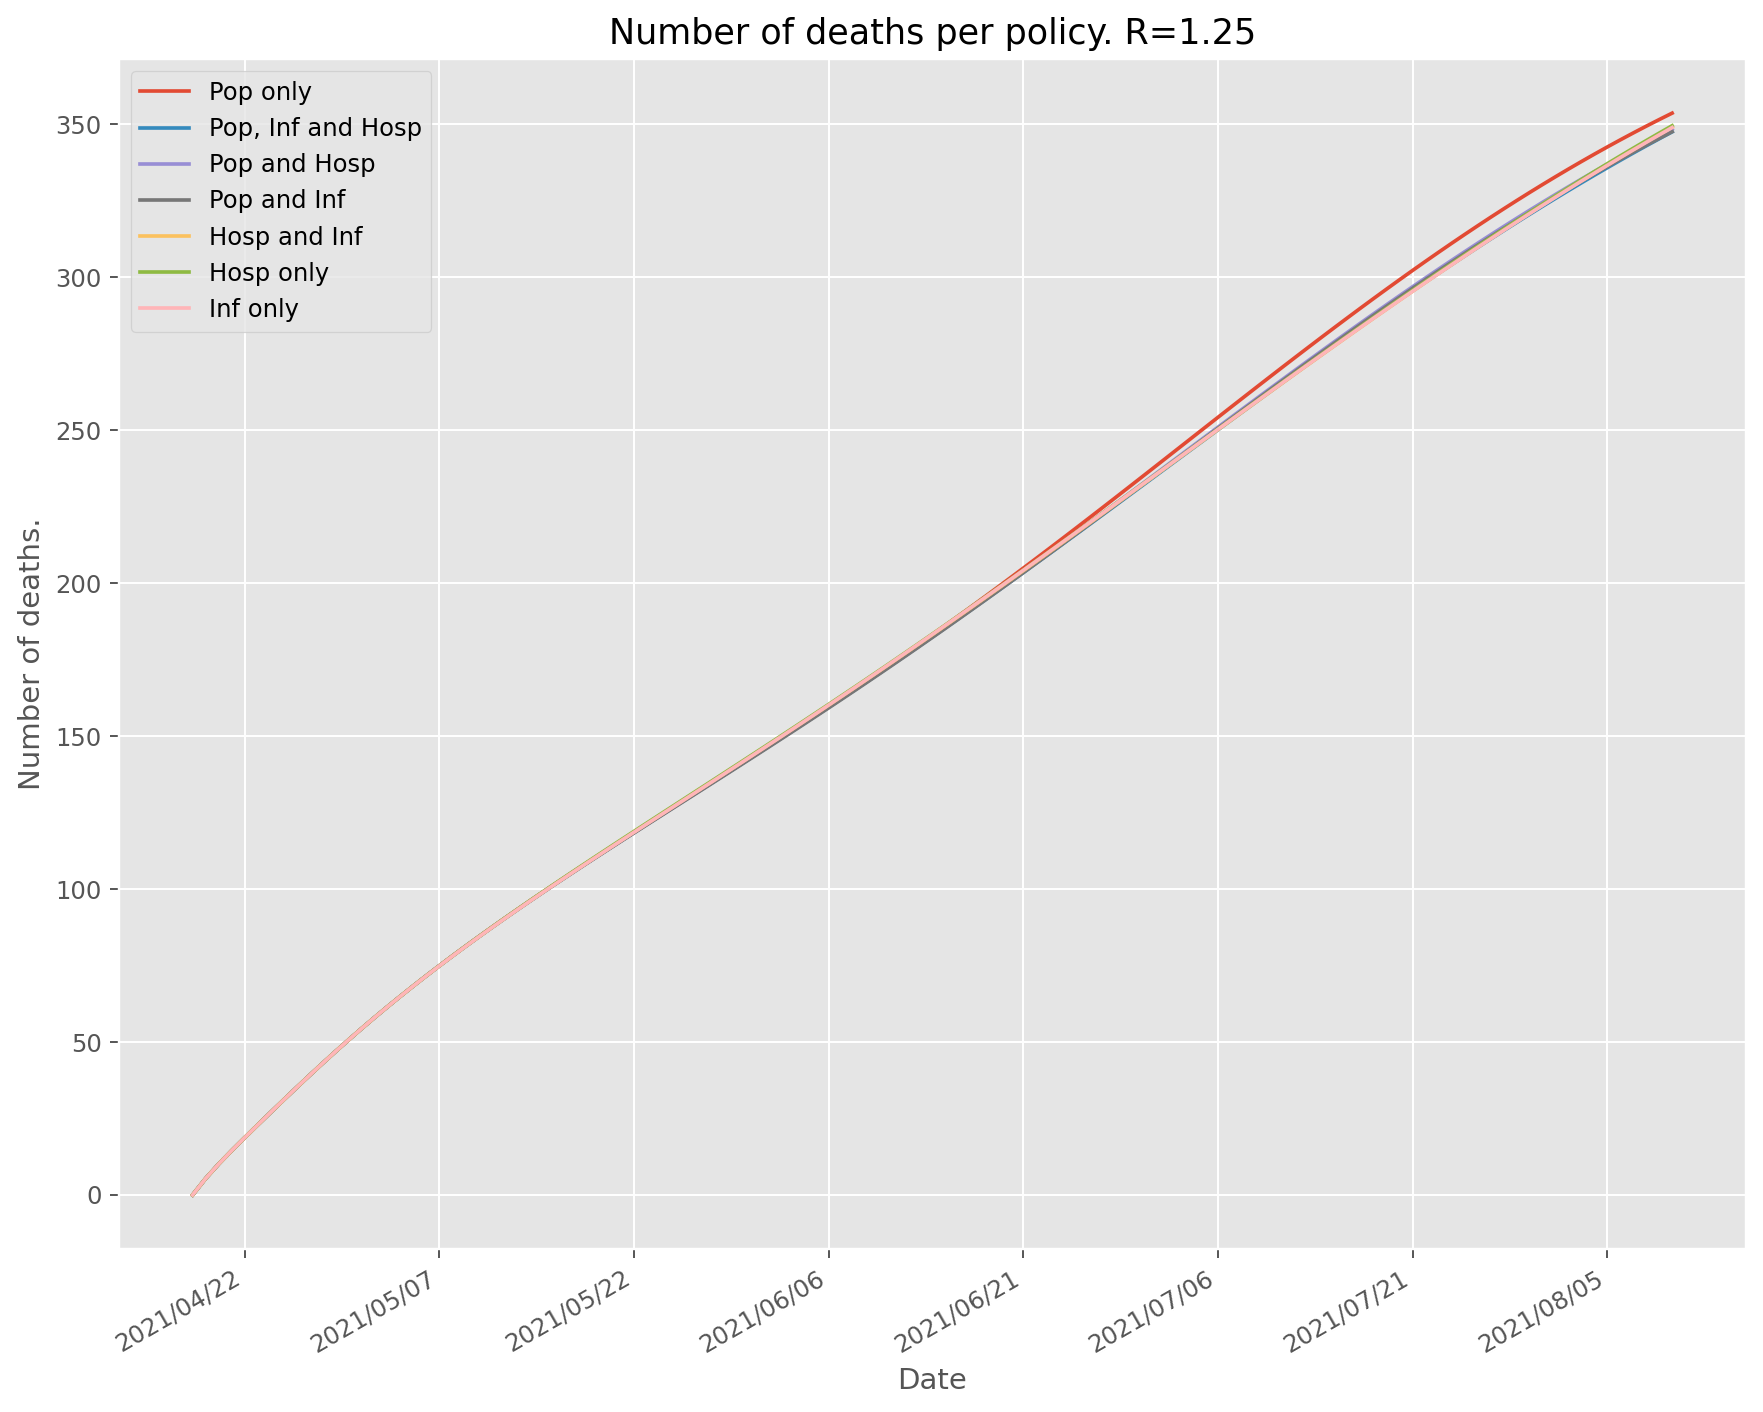

In [6]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 1173.4395623542443
Pop and Inf: 1177.269881213067
Pop and Hosp: 1180.1915193009163
Pop, Inf and Hosp: 1185.1164626138811
Hosp and Inf: 1206.754995265794
Inf only: 1207.1790725029402
Hosp only: 1207.2873249857869


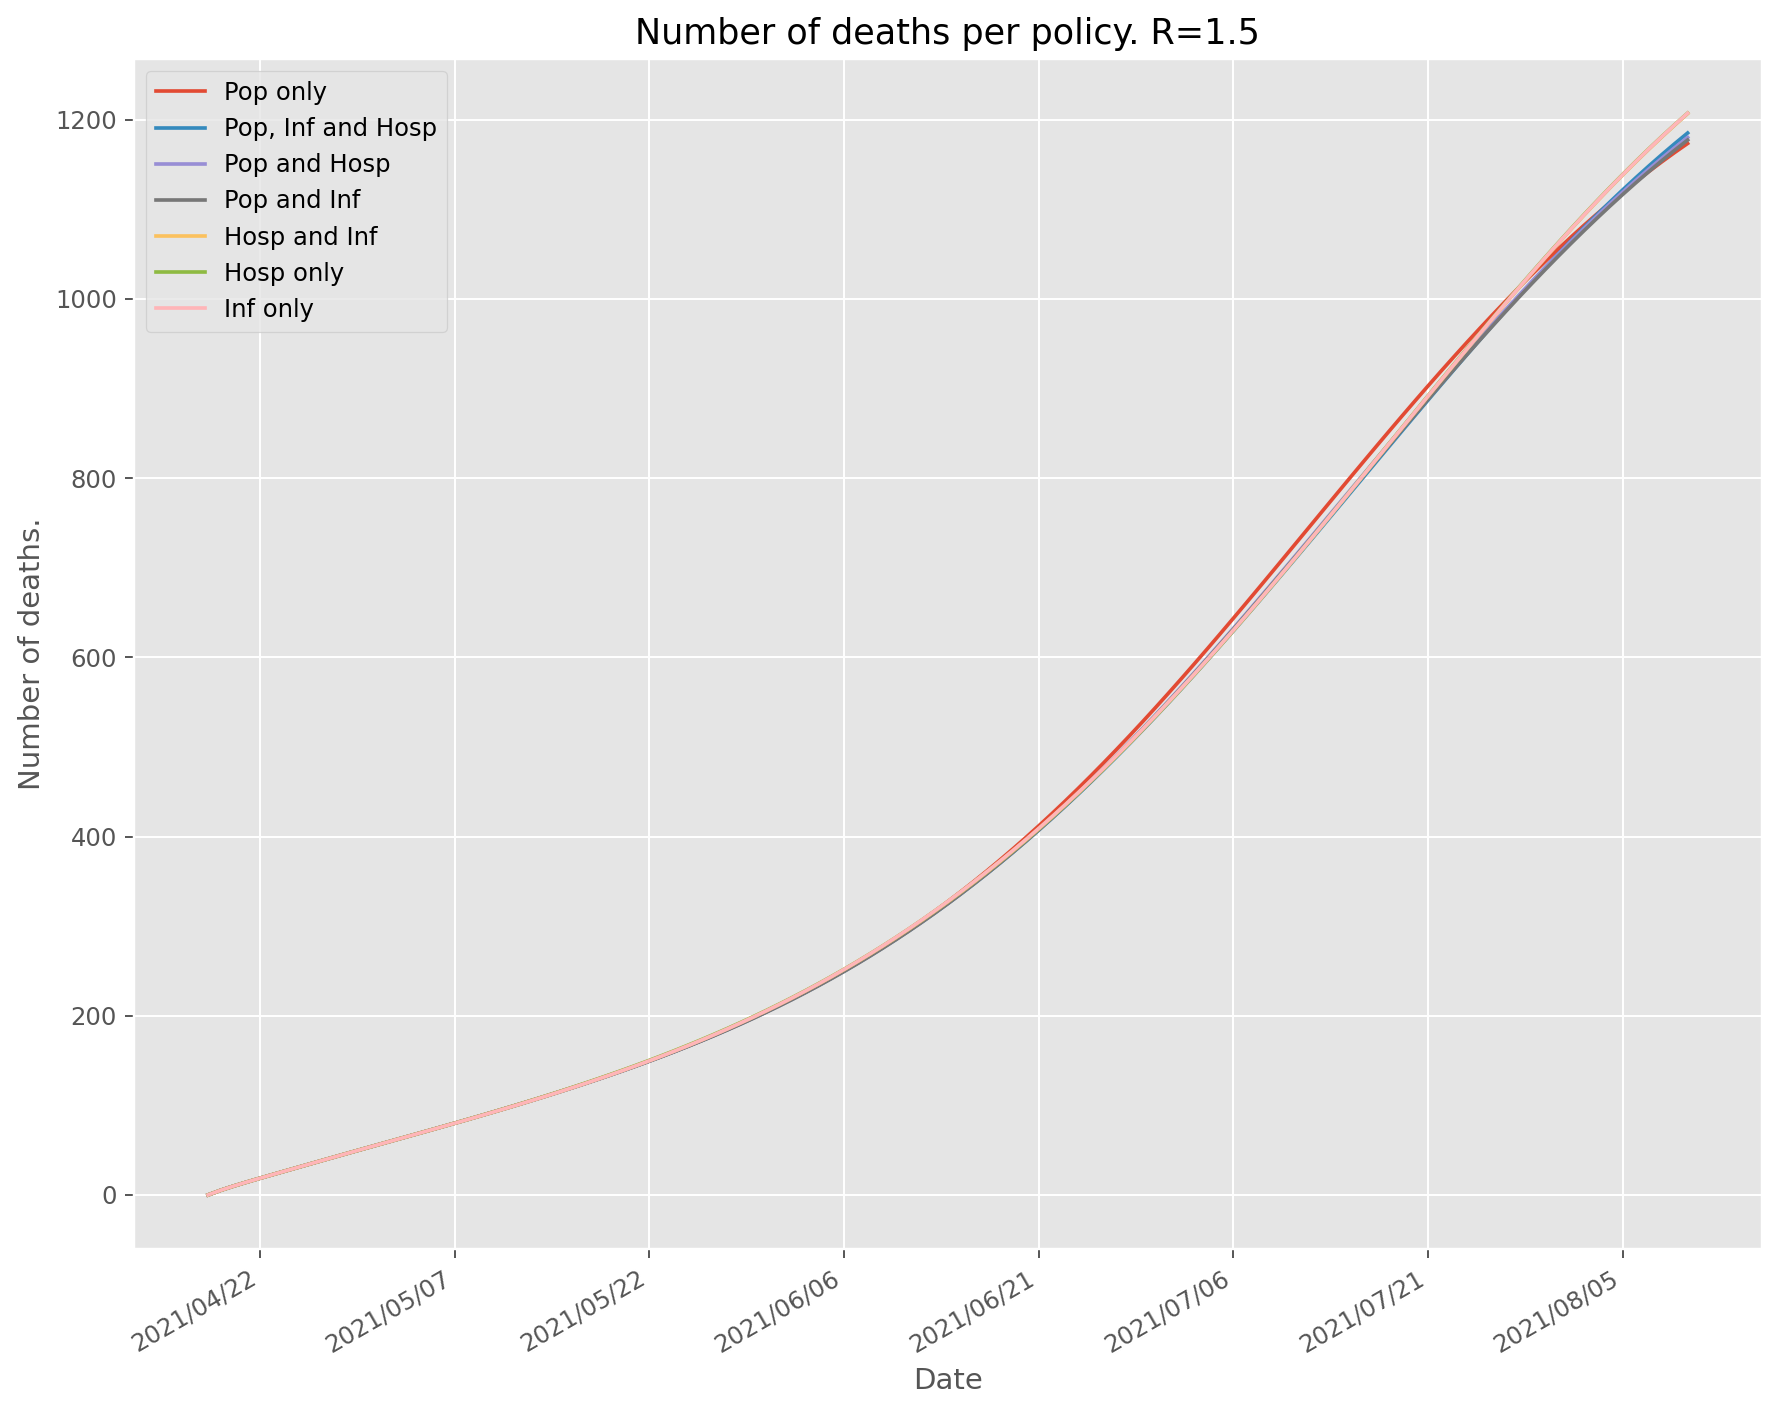

In [7]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 4231.67810424012
Pop and Inf: 4311.603666733239
Pop and Hosp: 4318.456742340111
Pop, Inf and Hosp: 4355.457040091471
Hosp only: 4479.082195932963
Hosp and Inf: 4483.161451847127
Inf only: 4492.898490517868


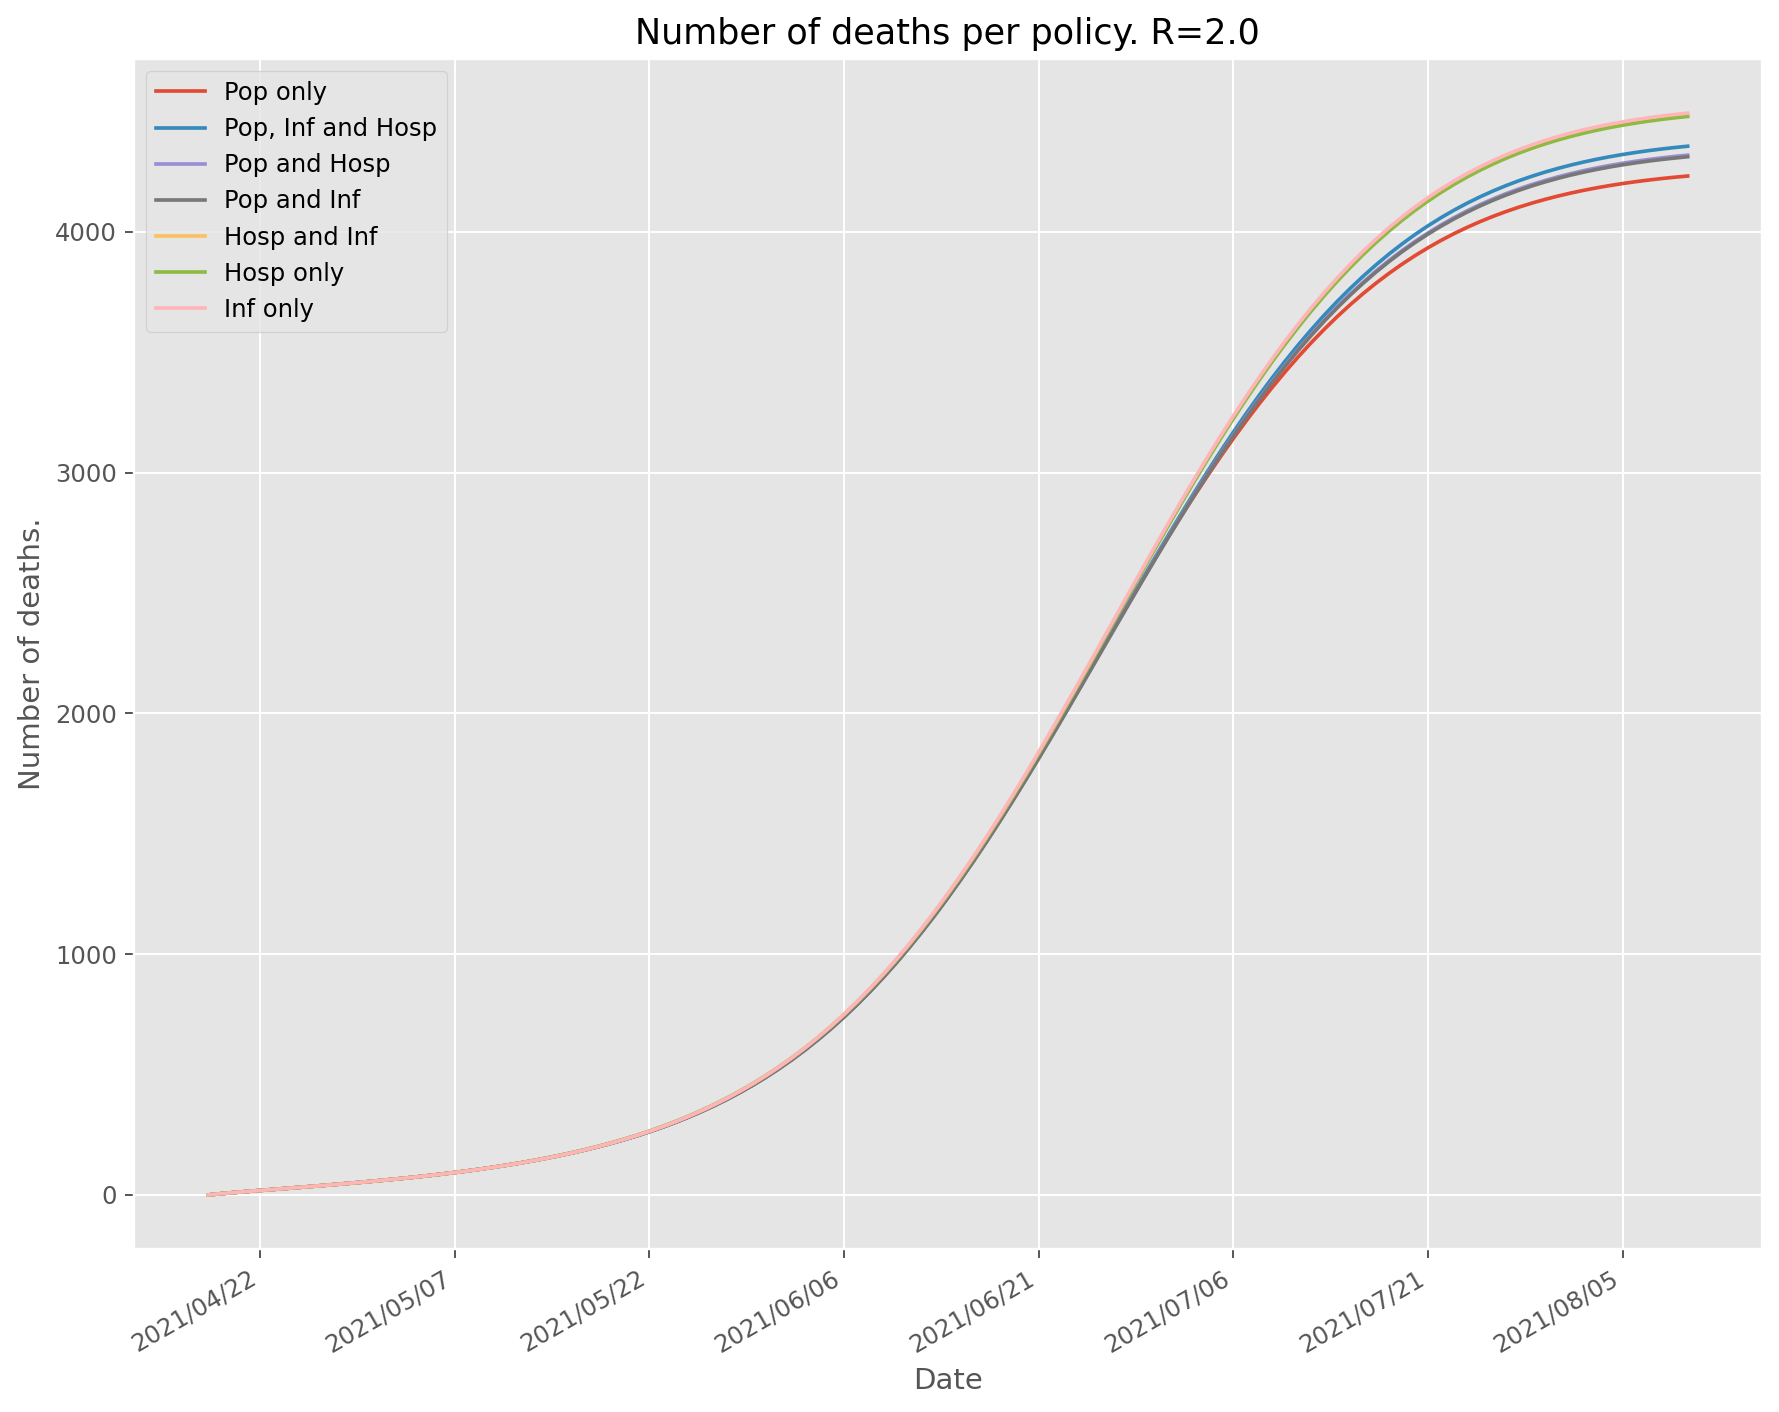

In [8]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Death incidence

Pop, Inf and Hosp: 139.23759560650237
Pop and Inf: 139.3001674106191
Inf only: 139.3740254530089
Hosp and Inf: 139.40648441931145
Pop and Hosp: 139.48825824769133
Hosp only: 139.5477144952952
Pop only: 140.5024351913601


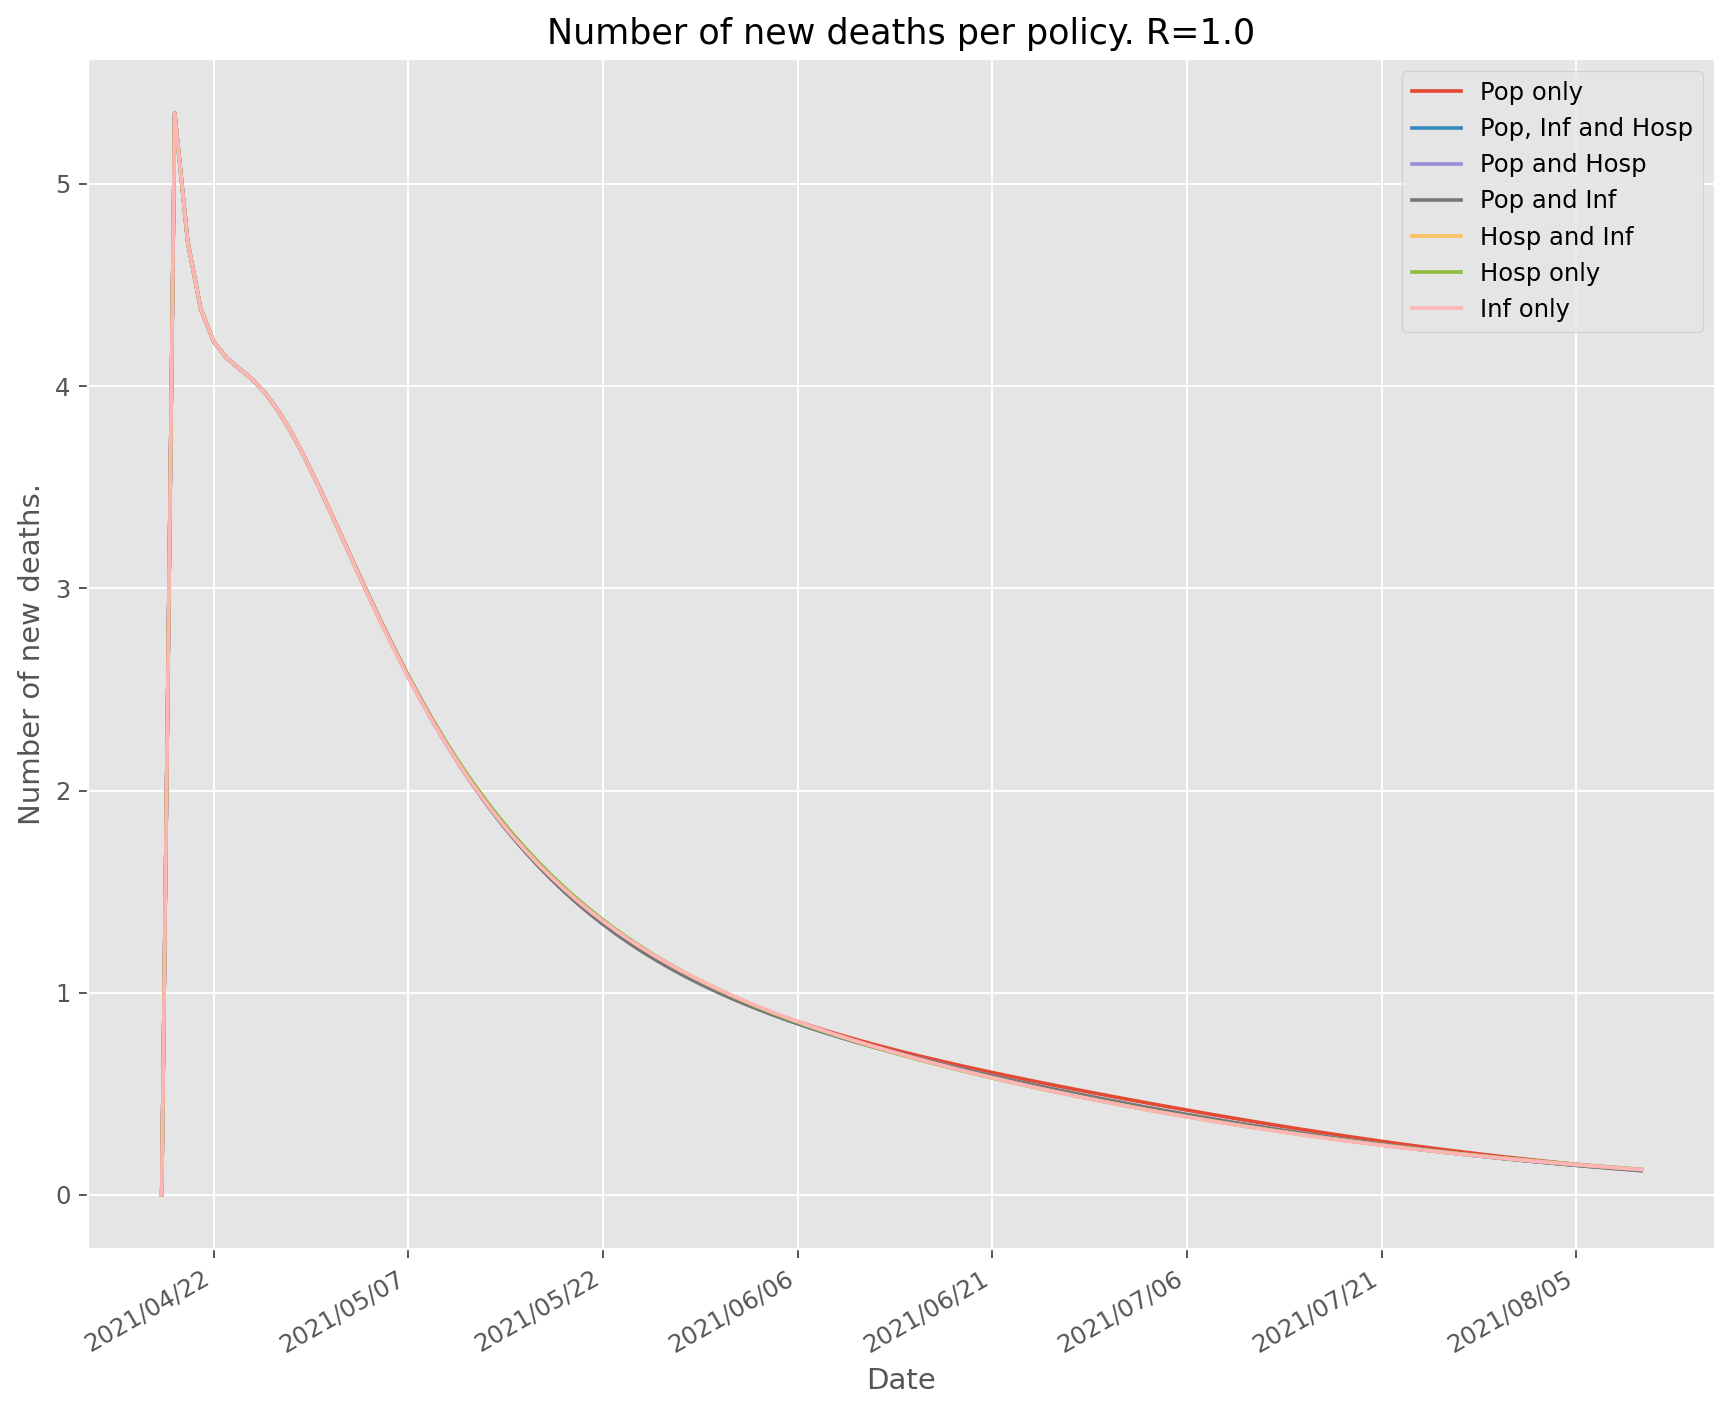

In [9]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop, Inf and Hosp: 347.57047076306606
Pop and Inf: 347.6181012770981
Pop and Hosp: 348.44110841490556
Inf only: 348.9858470856
Hosp and Inf: 349.13389651557947
Hosp only: 349.5757193314098
Pop only: 353.68773156443194


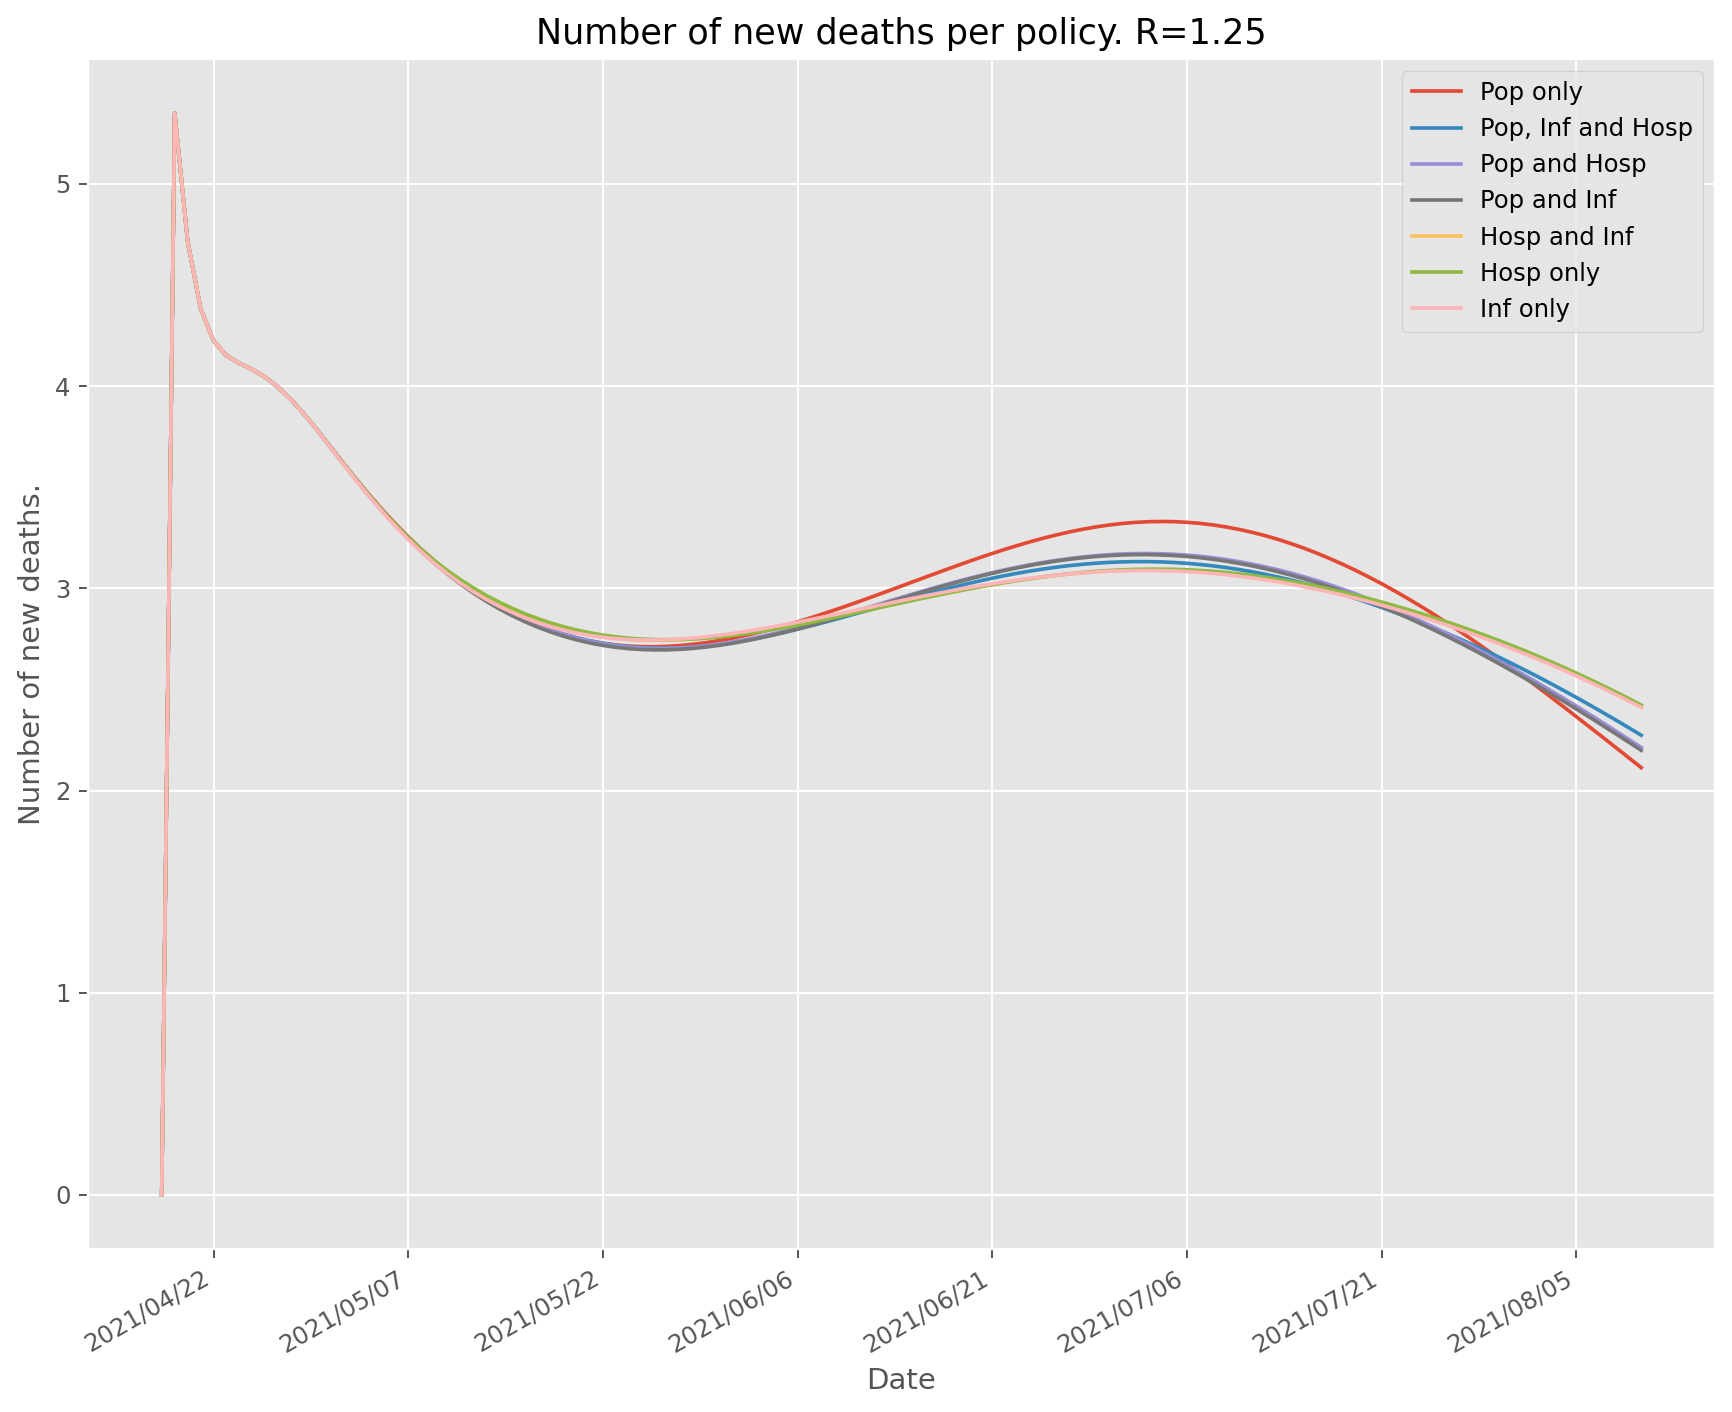

In [10]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 1173.4395623542441
Pop and Inf: 1177.269881213067
Pop and Hosp: 1180.1915193009163
Pop, Inf and Hosp: 1185.1164626138811
Hosp and Inf: 1206.754995265794
Inf only: 1207.1790725029402
Hosp only: 1207.2873249857869


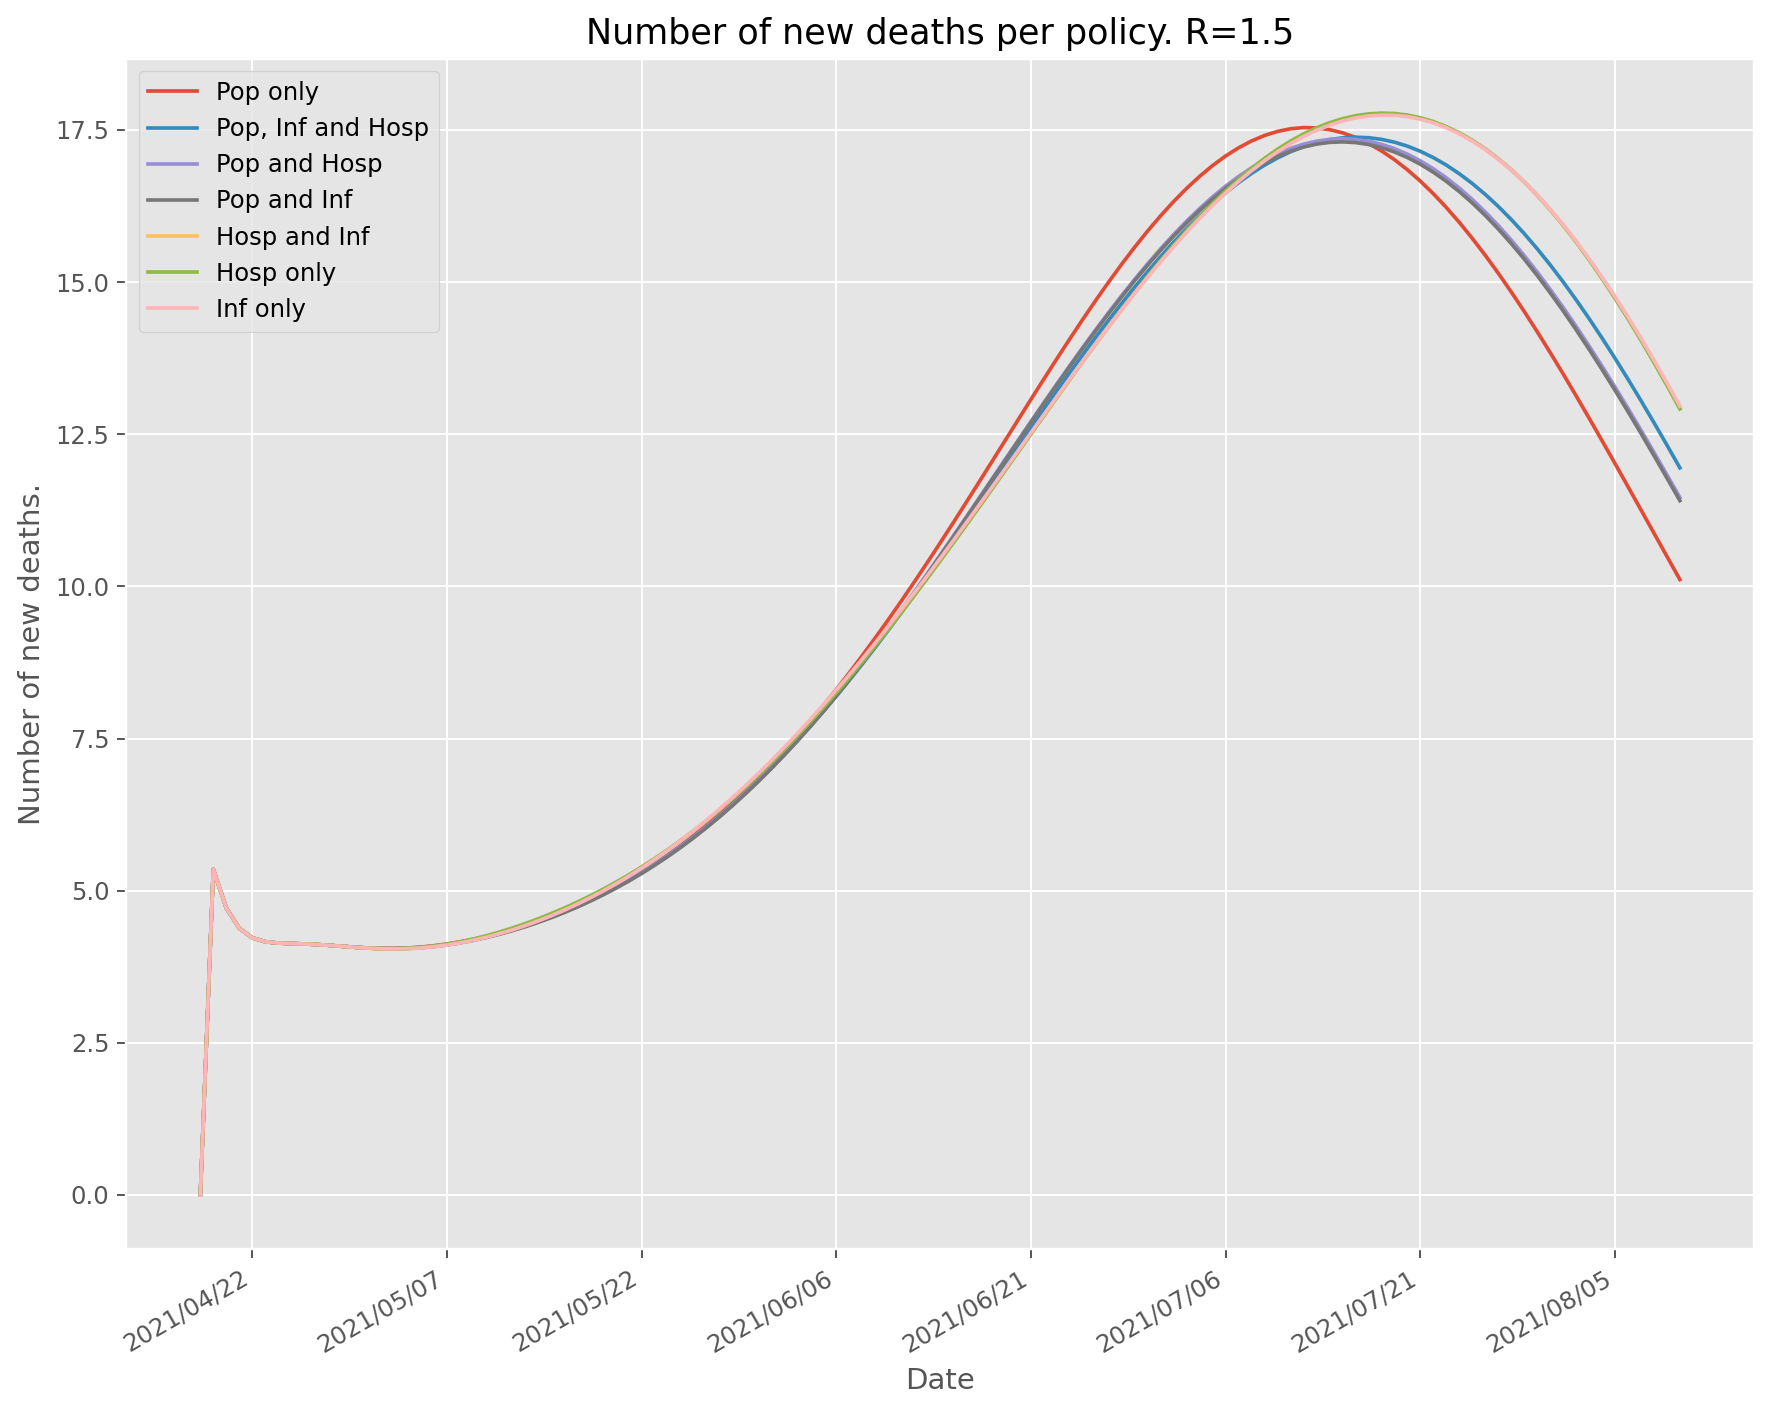

In [11]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 4231.67810424012
Pop and Inf: 4311.603666733238
Pop and Hosp: 4318.456742340112
Pop, Inf and Hosp: 4355.457040091472
Hosp only: 4479.082195932962
Hosp and Inf: 4483.161451847127
Inf only: 4492.898490517869


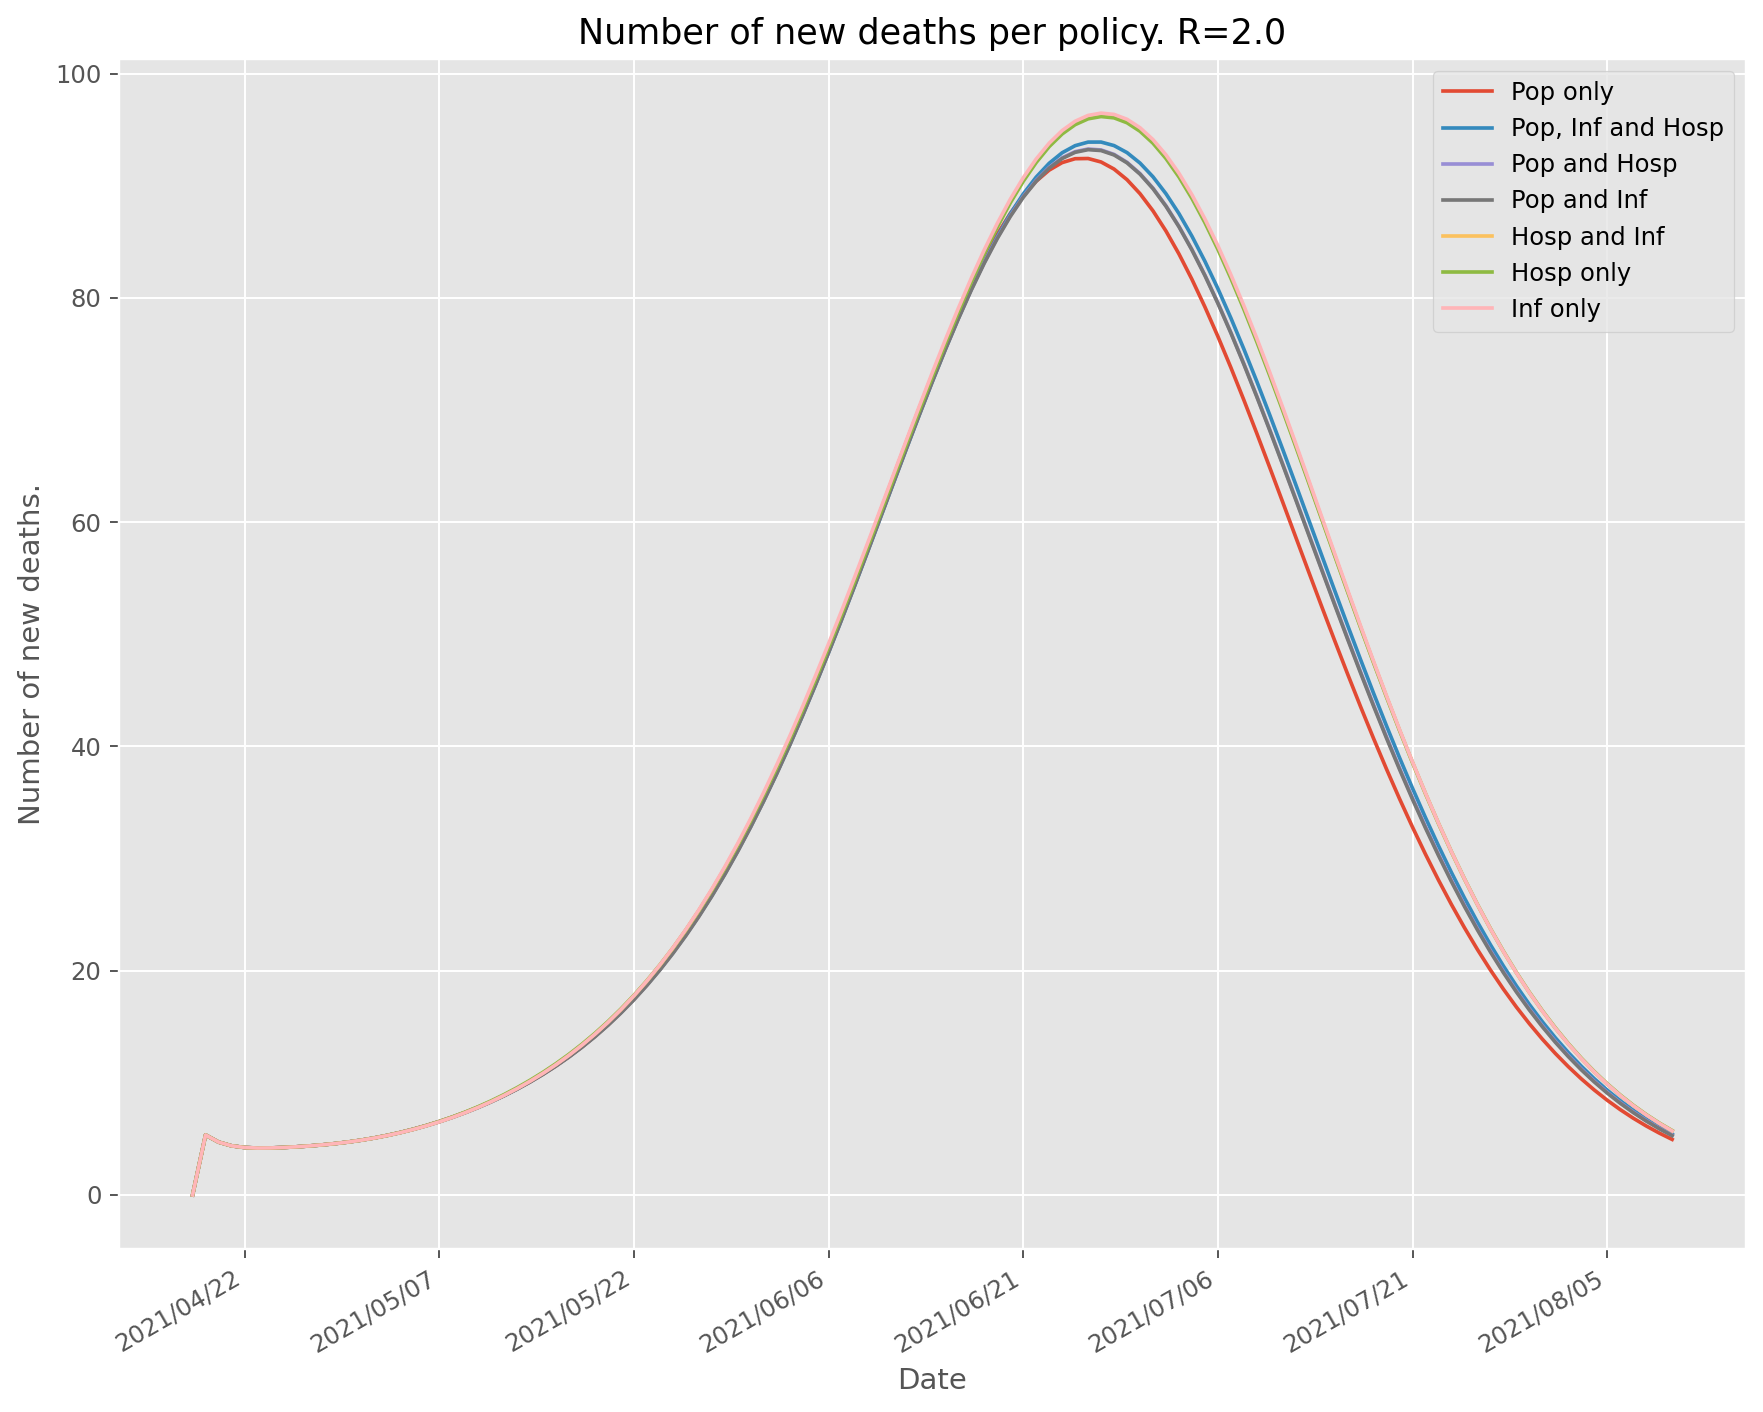

In [12]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='new deaths', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Hospitalizations

Inf only: 10401.997079208393
Hosp and Inf: 10413.621280815289
Hosp only: 10425.109954922007
Pop, Inf and Hosp: 10490.608660653736
Pop and Inf: 10541.27761939527
Pop and Hosp: 10550.940194266985
Pop only: 10812.097314159892


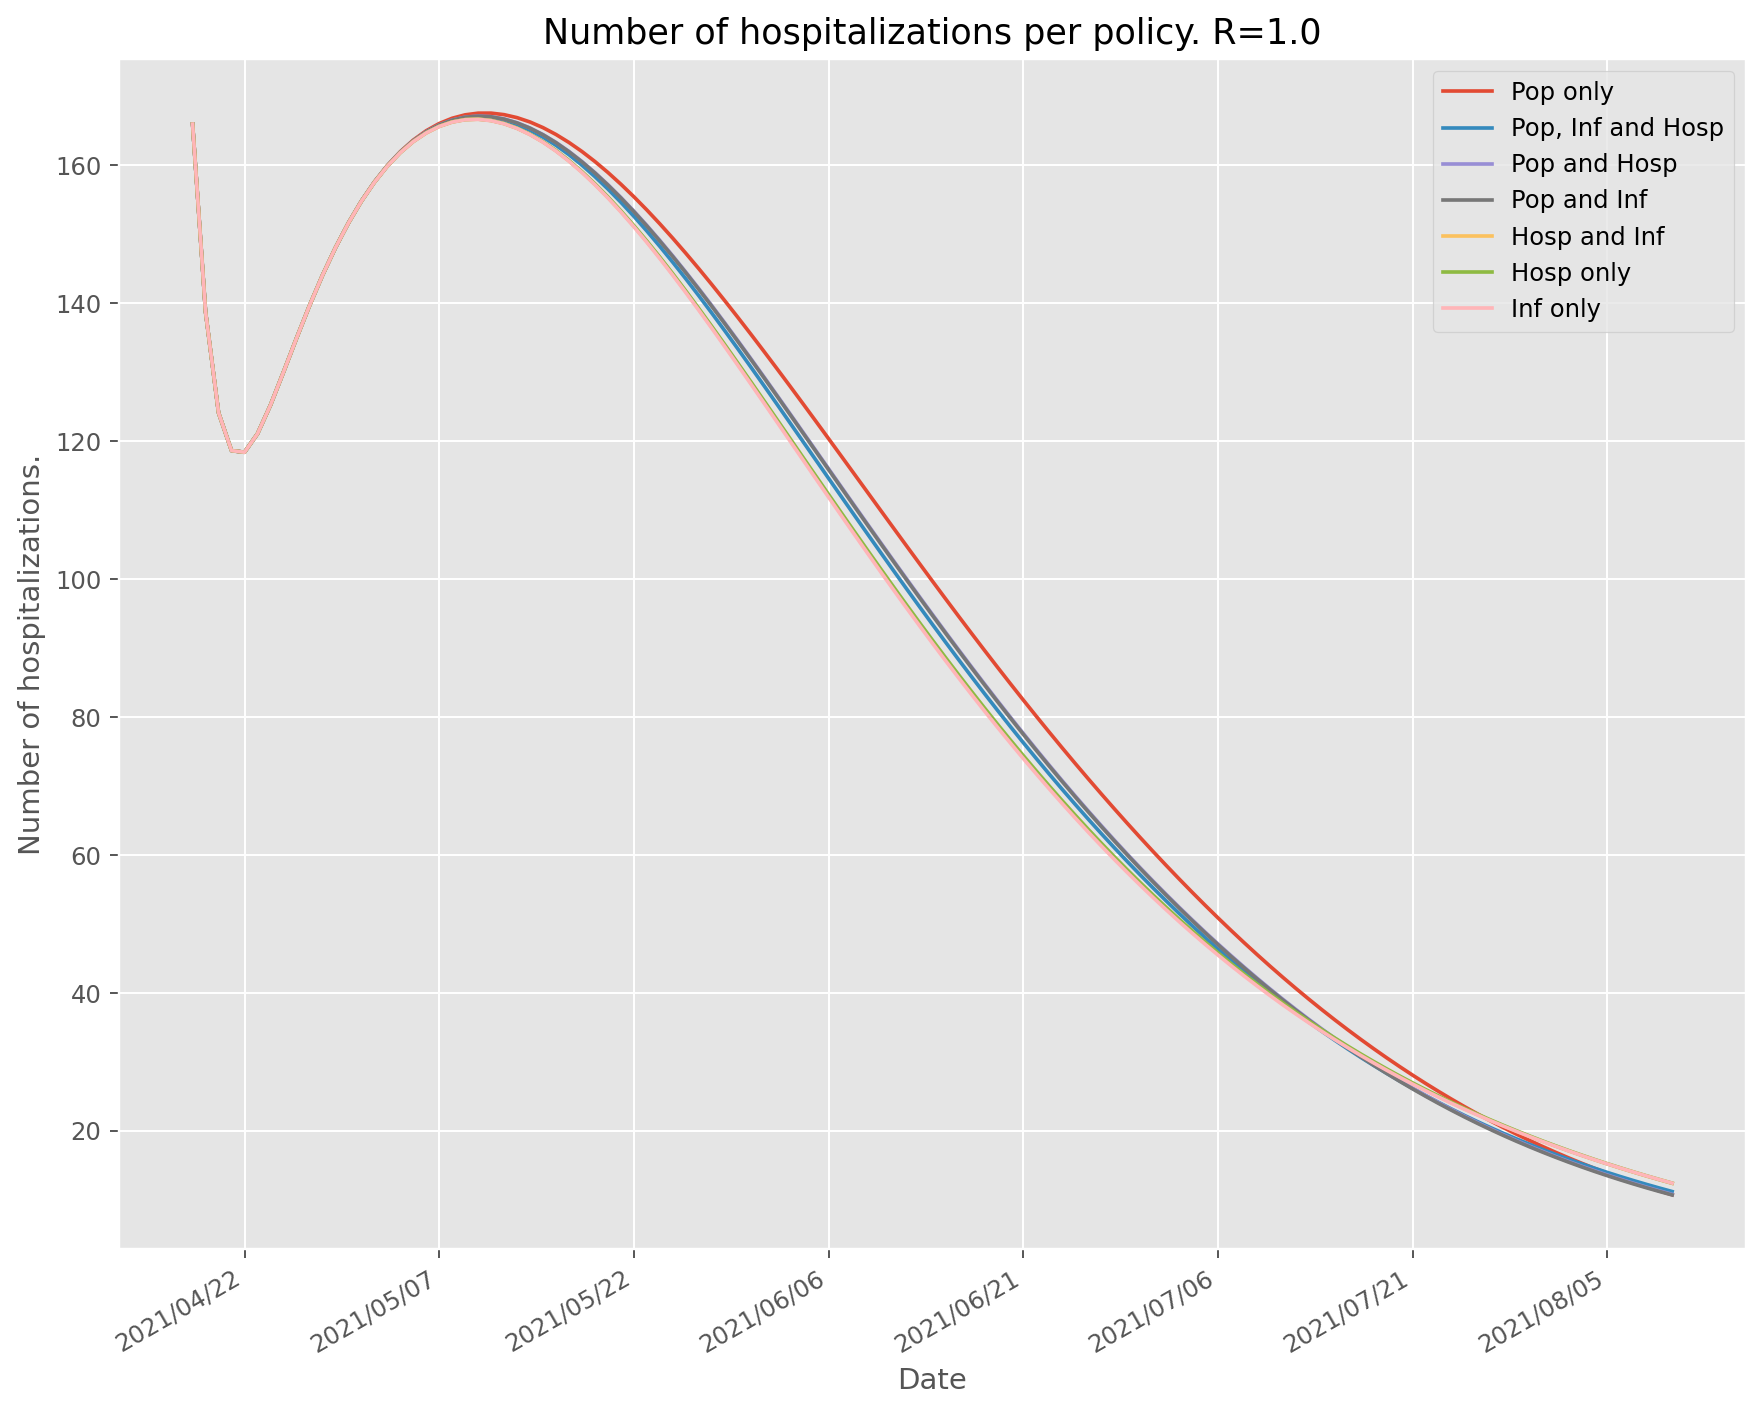

In [13]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop, Inf and Hosp: 35316.827767350034
Pop and Inf: 35319.9106310968
Pop and Hosp: 35394.836234728886
Inf only: 35486.292092265445
Hosp and Inf: 35536.62345133324
Hosp only: 35594.18543934331
Pop only: 36449.99913169275


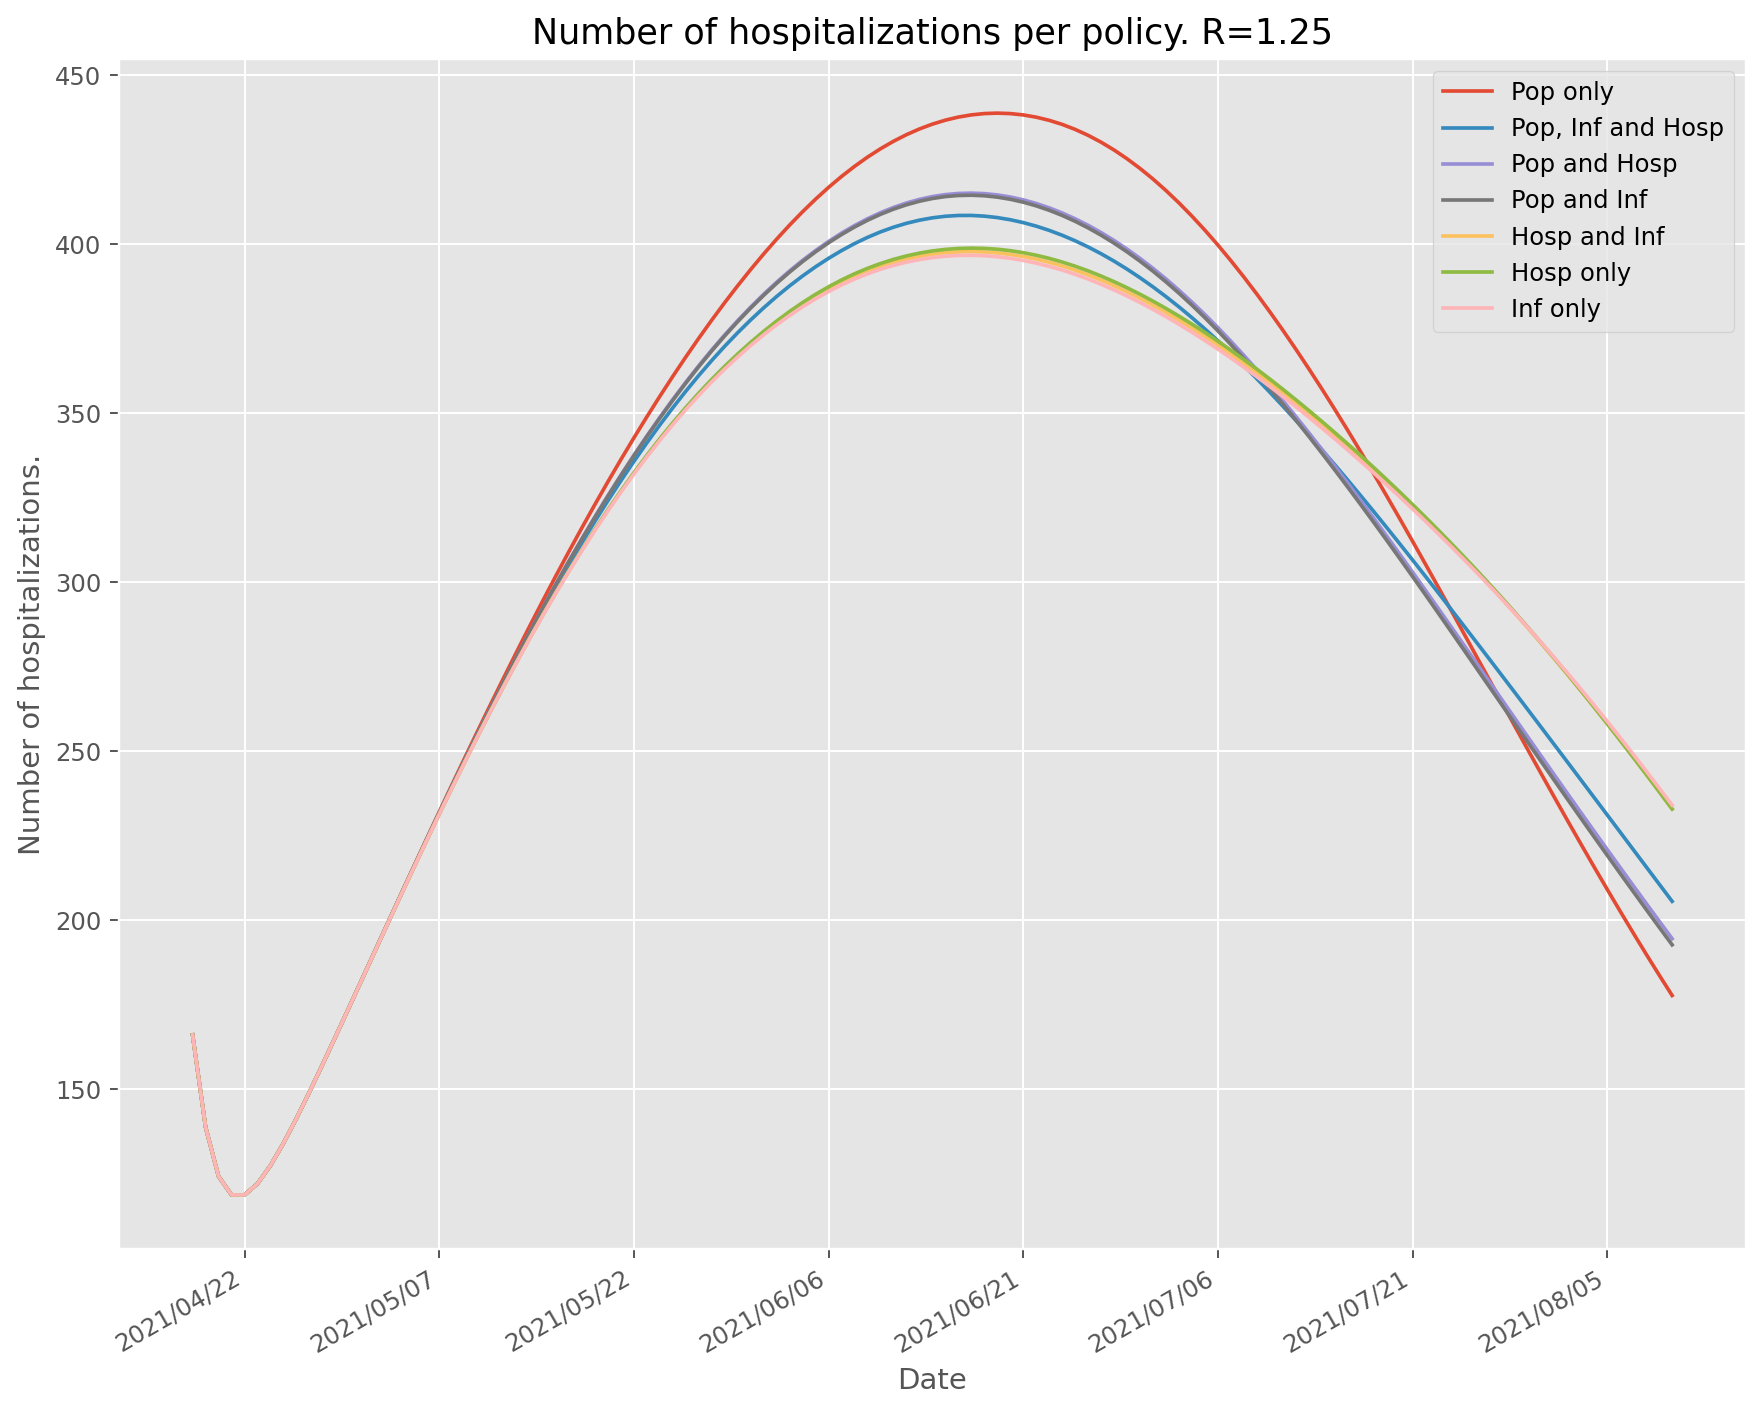

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 124530.63680676003
Pop and Inf: 124767.58836437511
Pop and Hosp: 125084.64450866249
Pop, Inf and Hosp: 126212.01368240487
Inf only: 129830.24617173527
Hosp and Inf: 129884.34307177448
Hosp only: 130018.37160727718


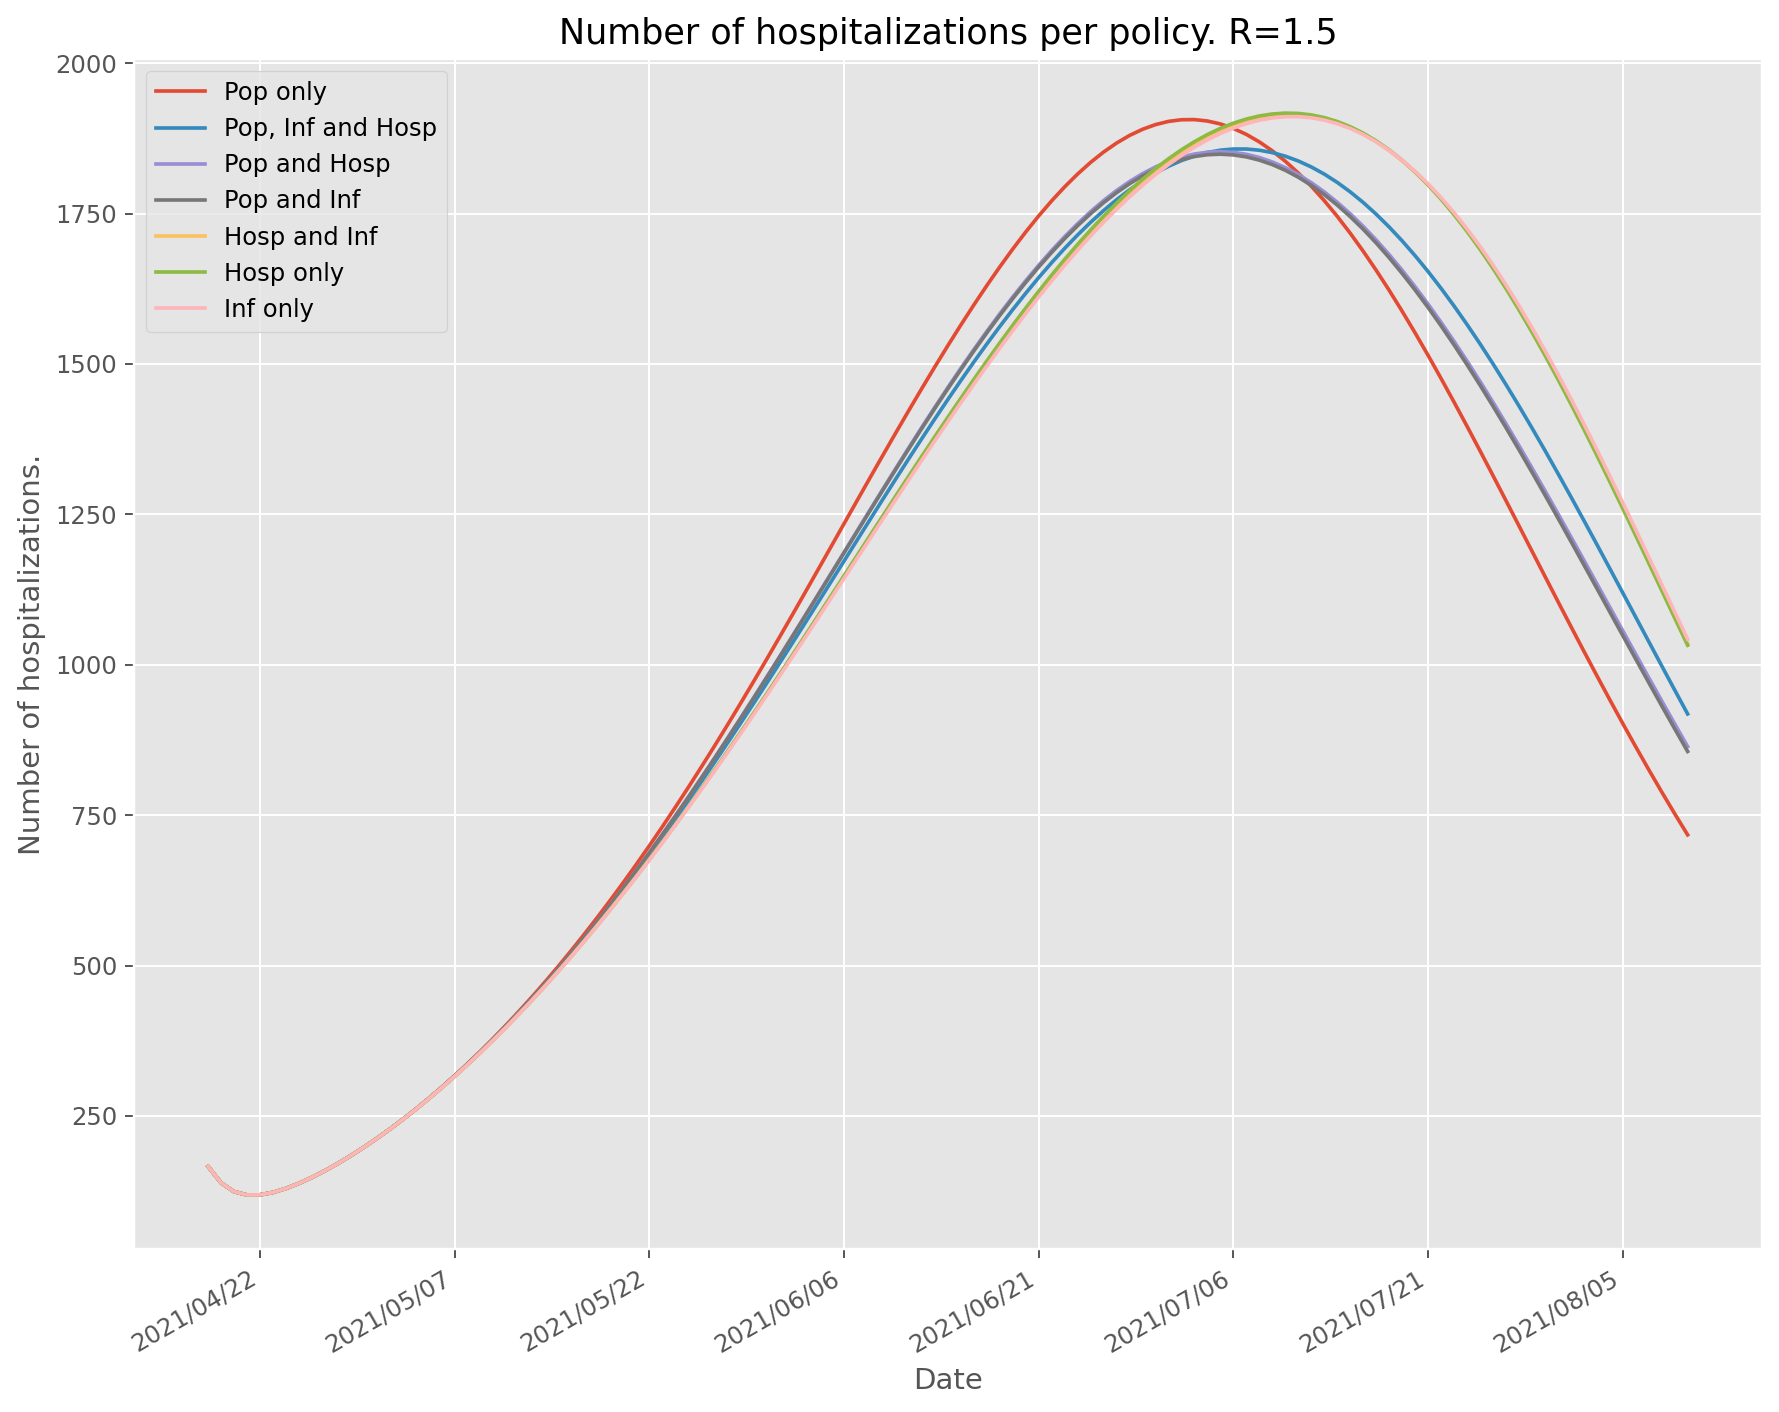

In [15]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 395386.801556574
Pop and Inf: 403846.63743770536
Pop and Hosp: 404654.01218295493
Pop, Inf and Hosp: 408989.04935010825
Inf only: 420513.18691817526
Hosp and Inf: 421063.2424349008
Hosp only: 421778.75300737965


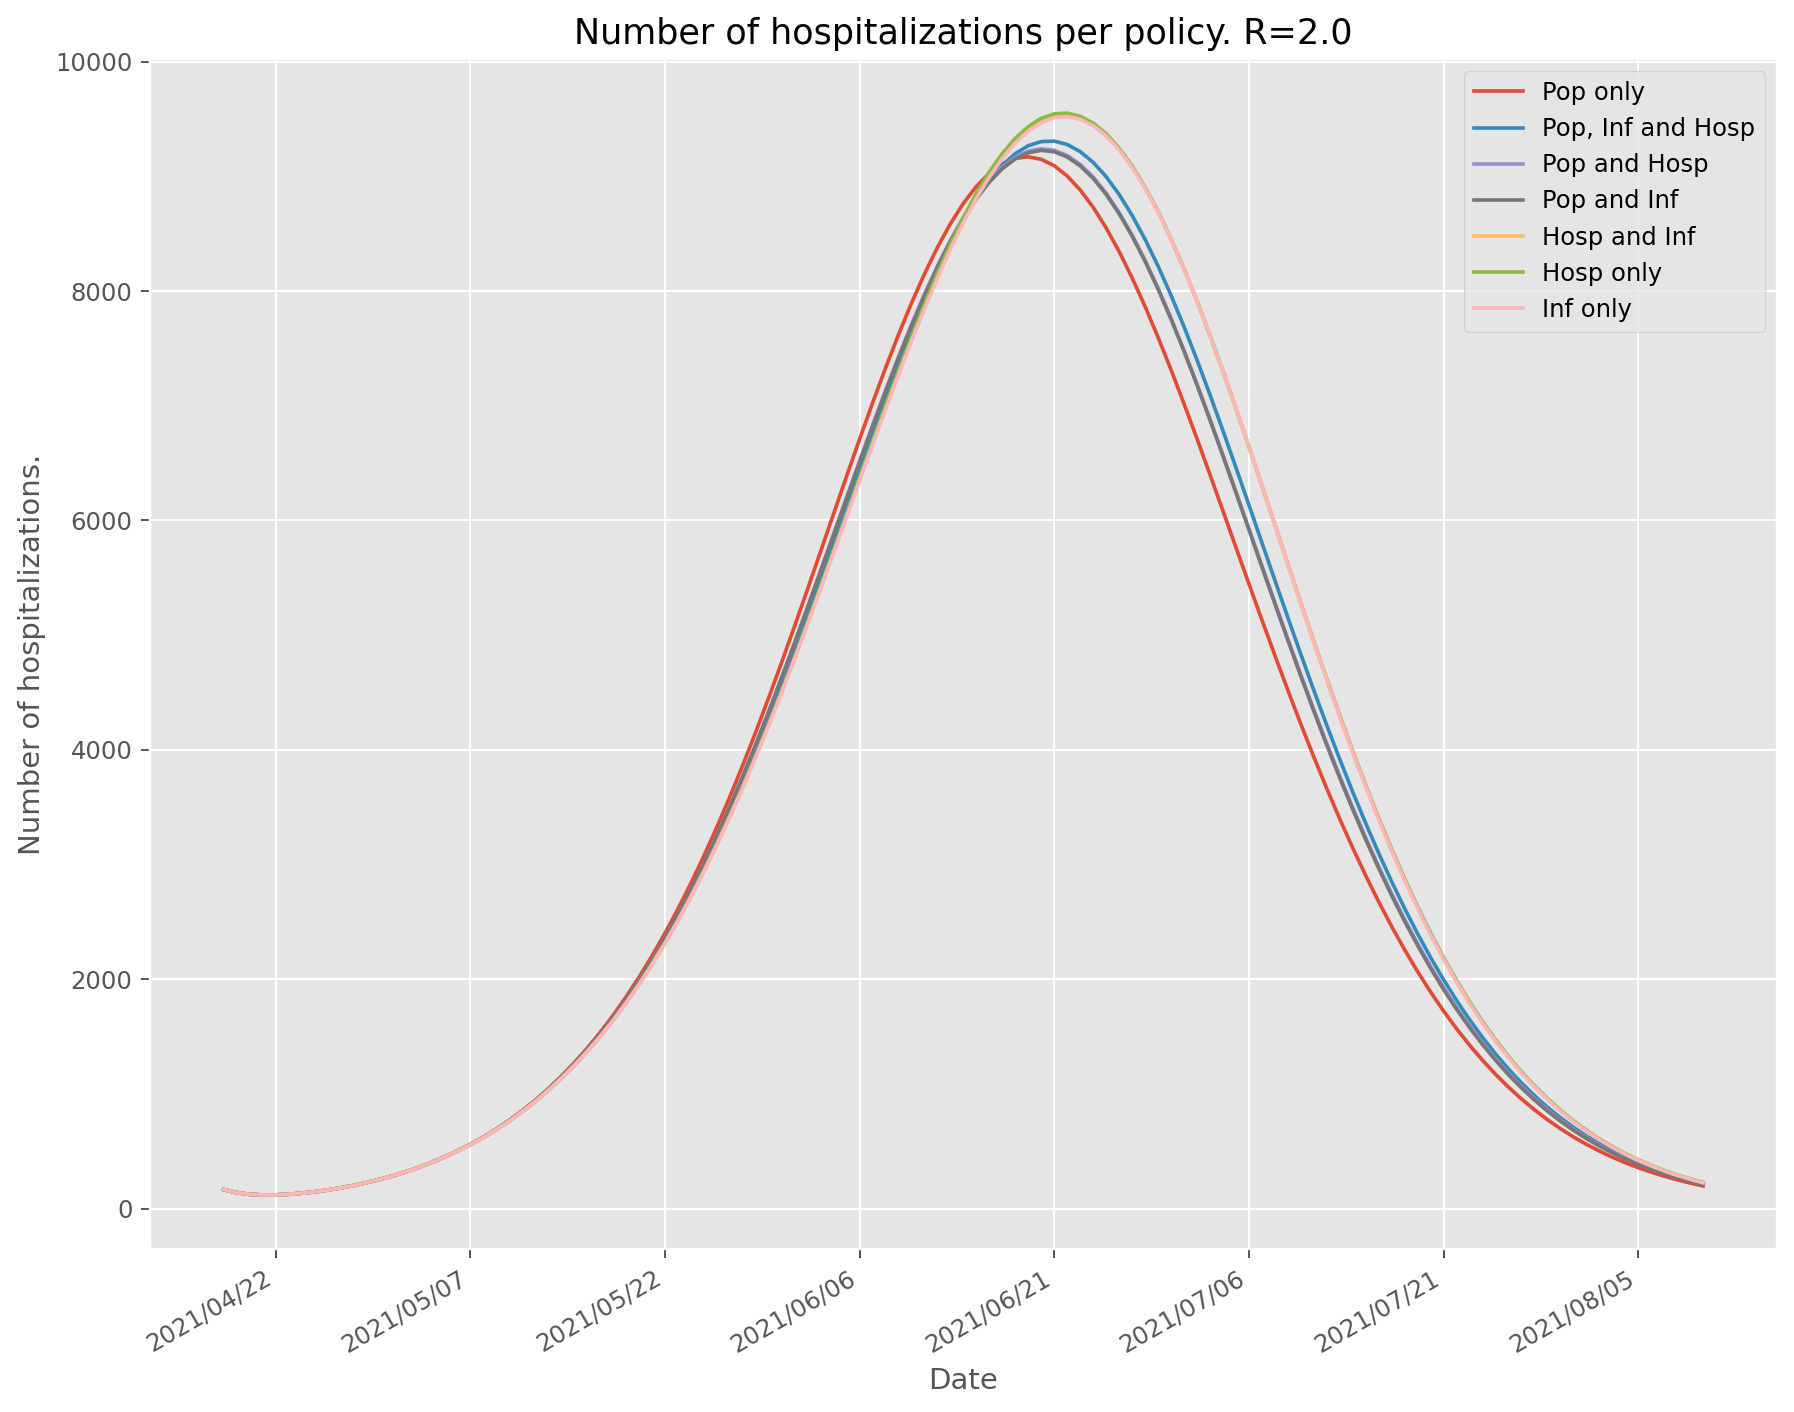

In [16]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# New Hospitalizations

Inf only: 1844.4887937016106
Hosp and Inf: 1846.7316944825313
Hosp only: 1848.9575242416438
Pop, Inf and Hosp: 1861.2690506837598
Pop and Inf: 1870.9273315977127
Pop and Hosp: 1872.863614252577
Pop only: 1924.2773999756887


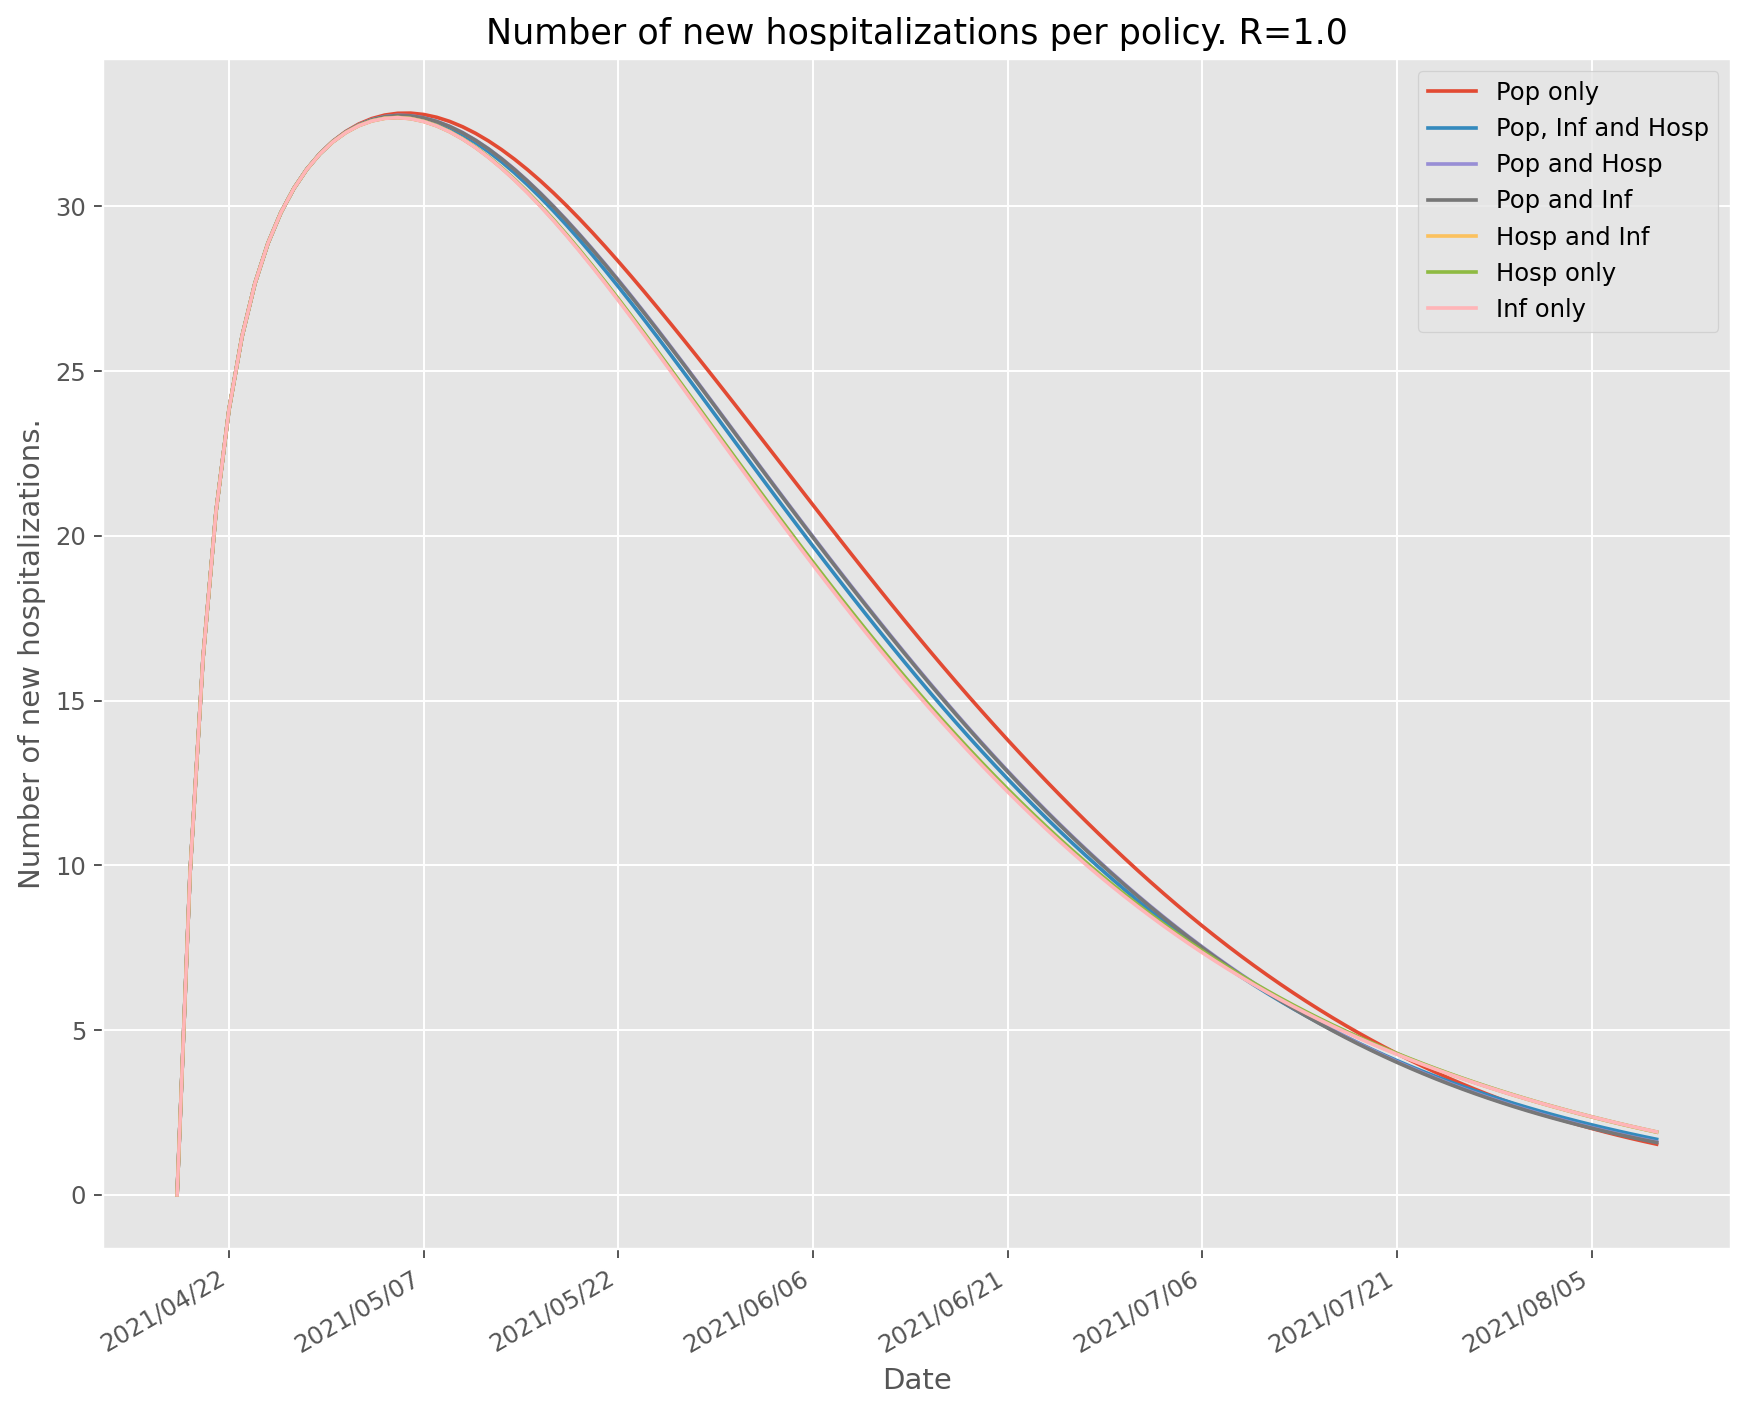

In [17]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop and Inf: 6904.548495145254
Pop, Inf and Hosp: 6915.792242927381
Pop and Hosp: 6921.052502073096
Inf only: 6973.166722236989
Hosp and Inf: 6982.22158162312
Hosp only: 6993.510410511153
Pop only: 7112.430505604577


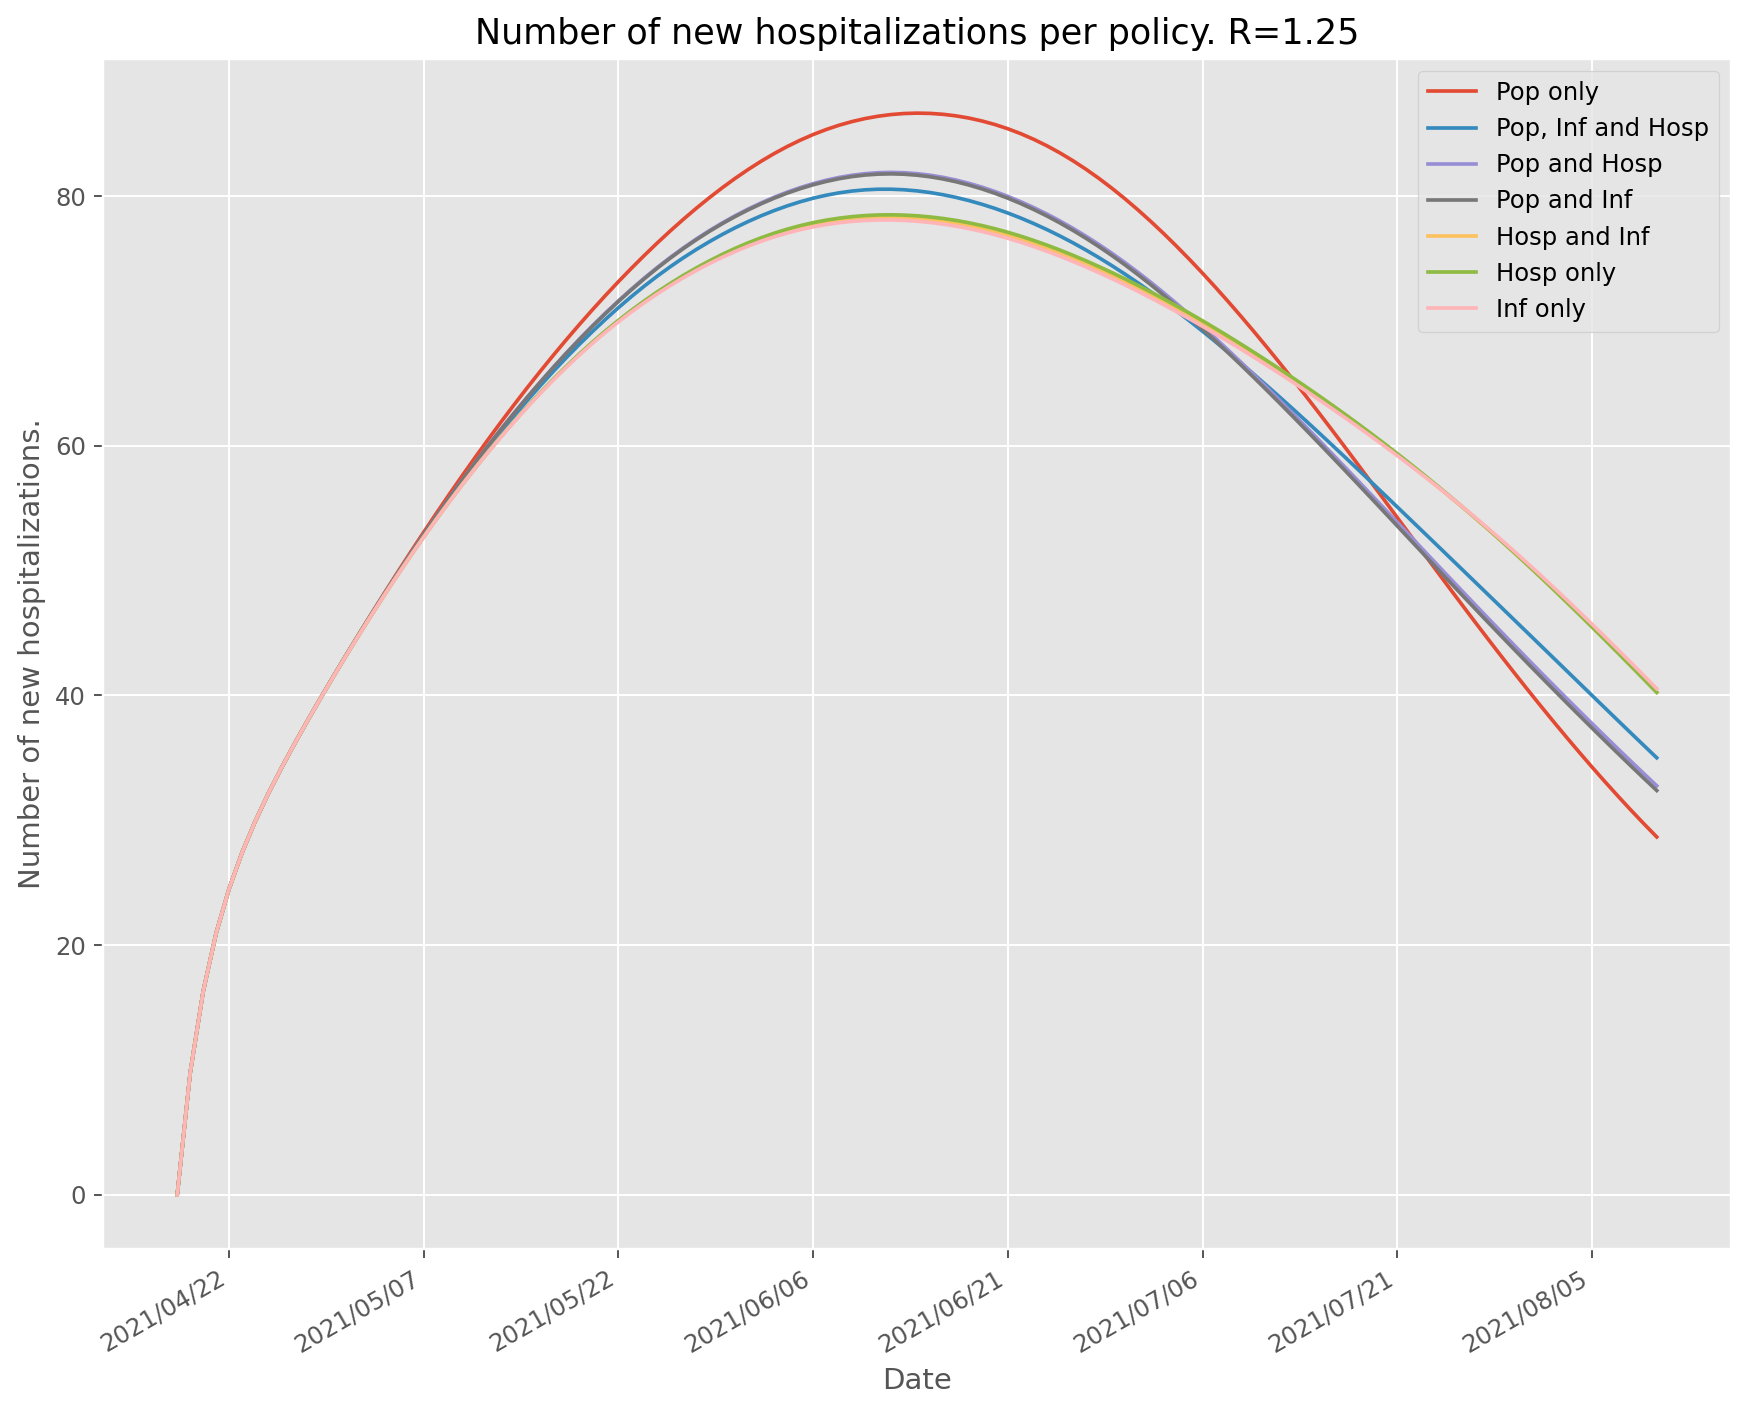

In [18]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 24880.2500786548
Pop and Inf: 25056.435792007
Pop and Hosp: 25127.10326160308
Pop, Inf and Hosp: 25395.395755533173
Inf only: 26202.133411131046
Hosp and Inf: 26206.9631748692
Hosp only: 26232.31458384831


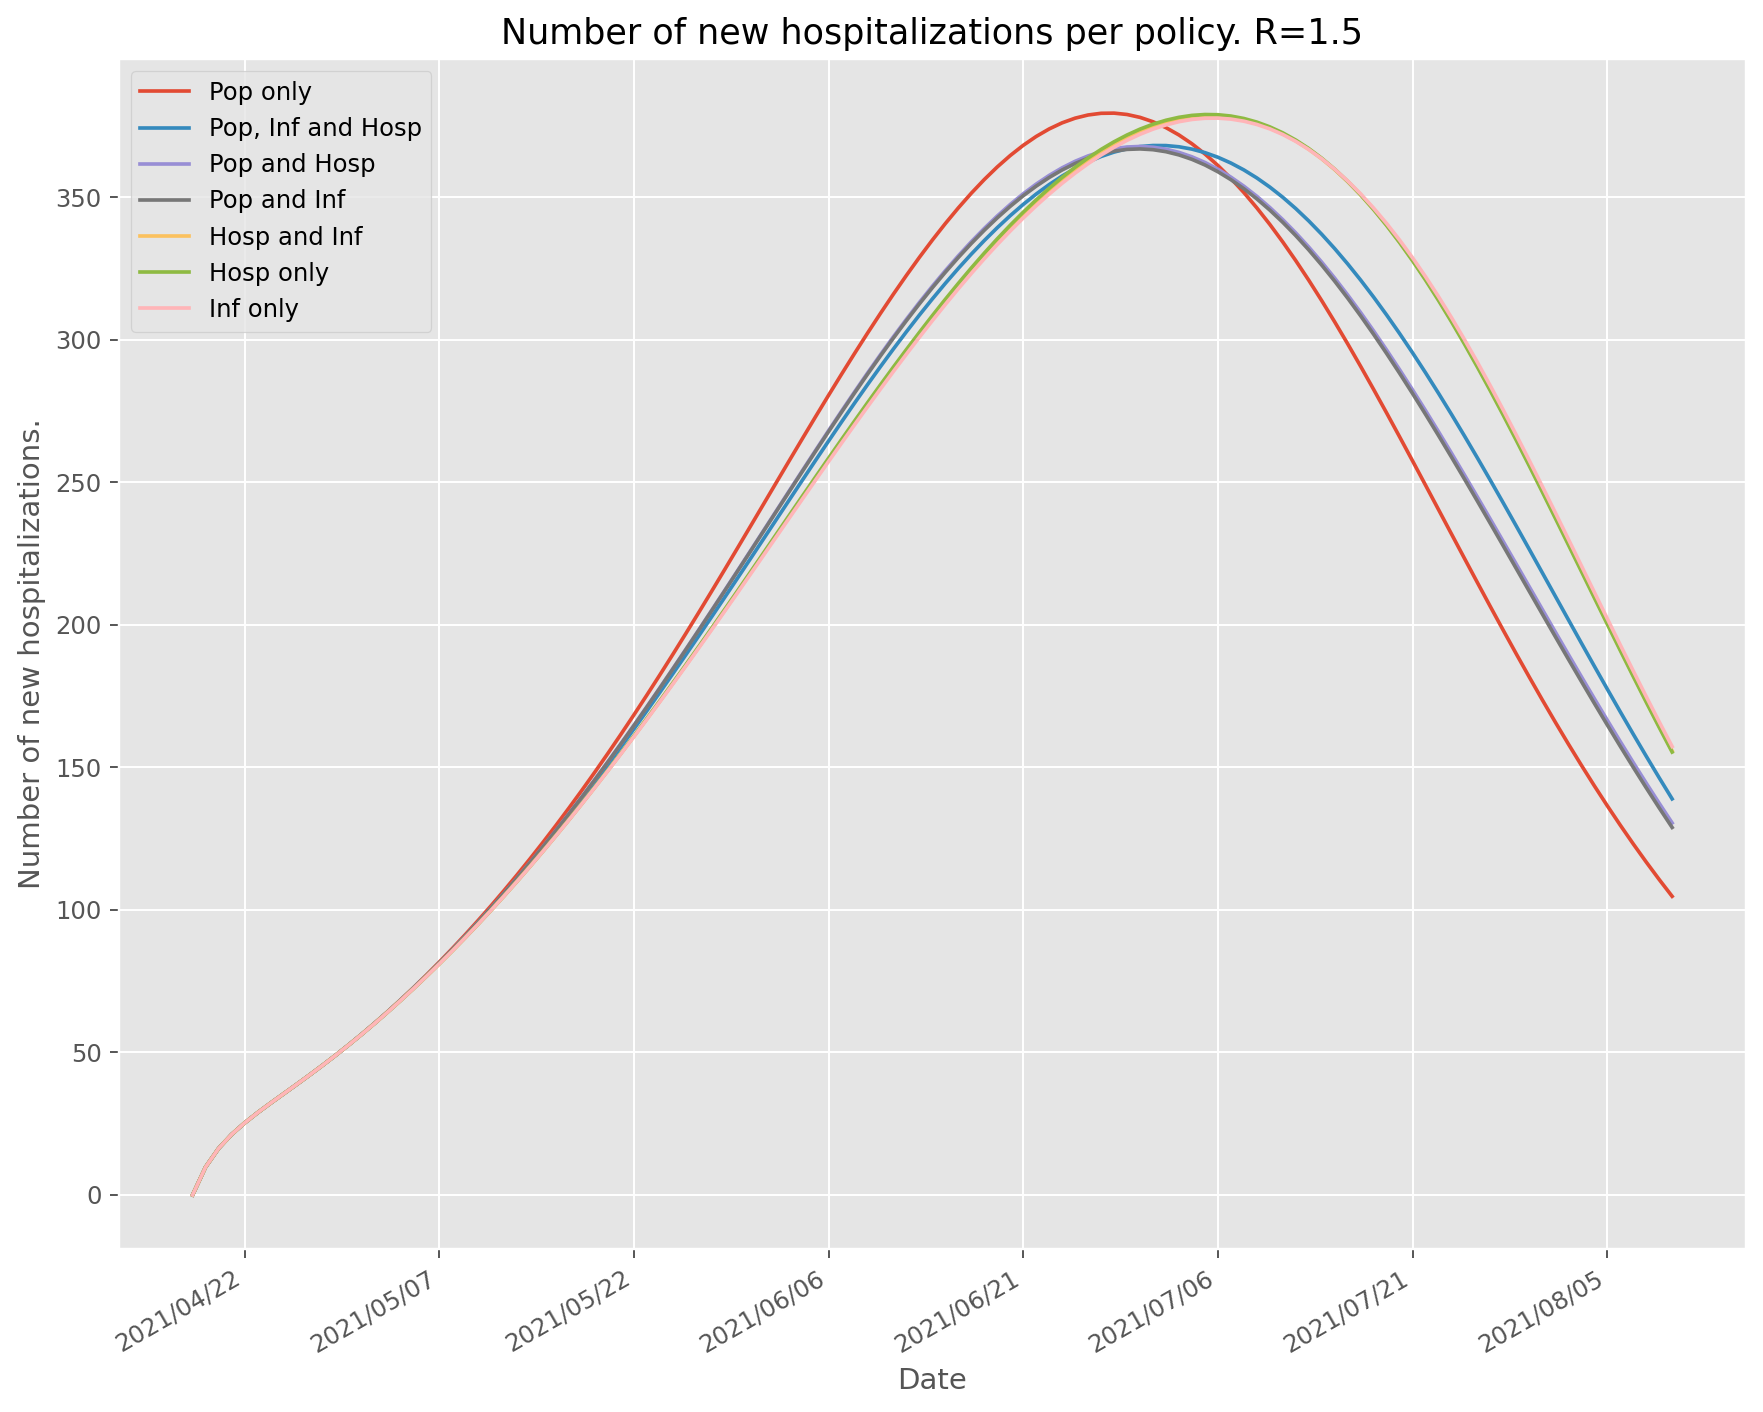

In [19]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Pop only: 24880.2500786548
Pop and Inf: 25056.435792007
Pop and Hosp: 25127.10326160308
Pop, Inf and Hosp: 25395.395755533173
Inf only: 26202.133411131046
Hosp and Inf: 26206.9631748692
Hosp only: 26232.31458384831
No vaccination: 77348.54003013165


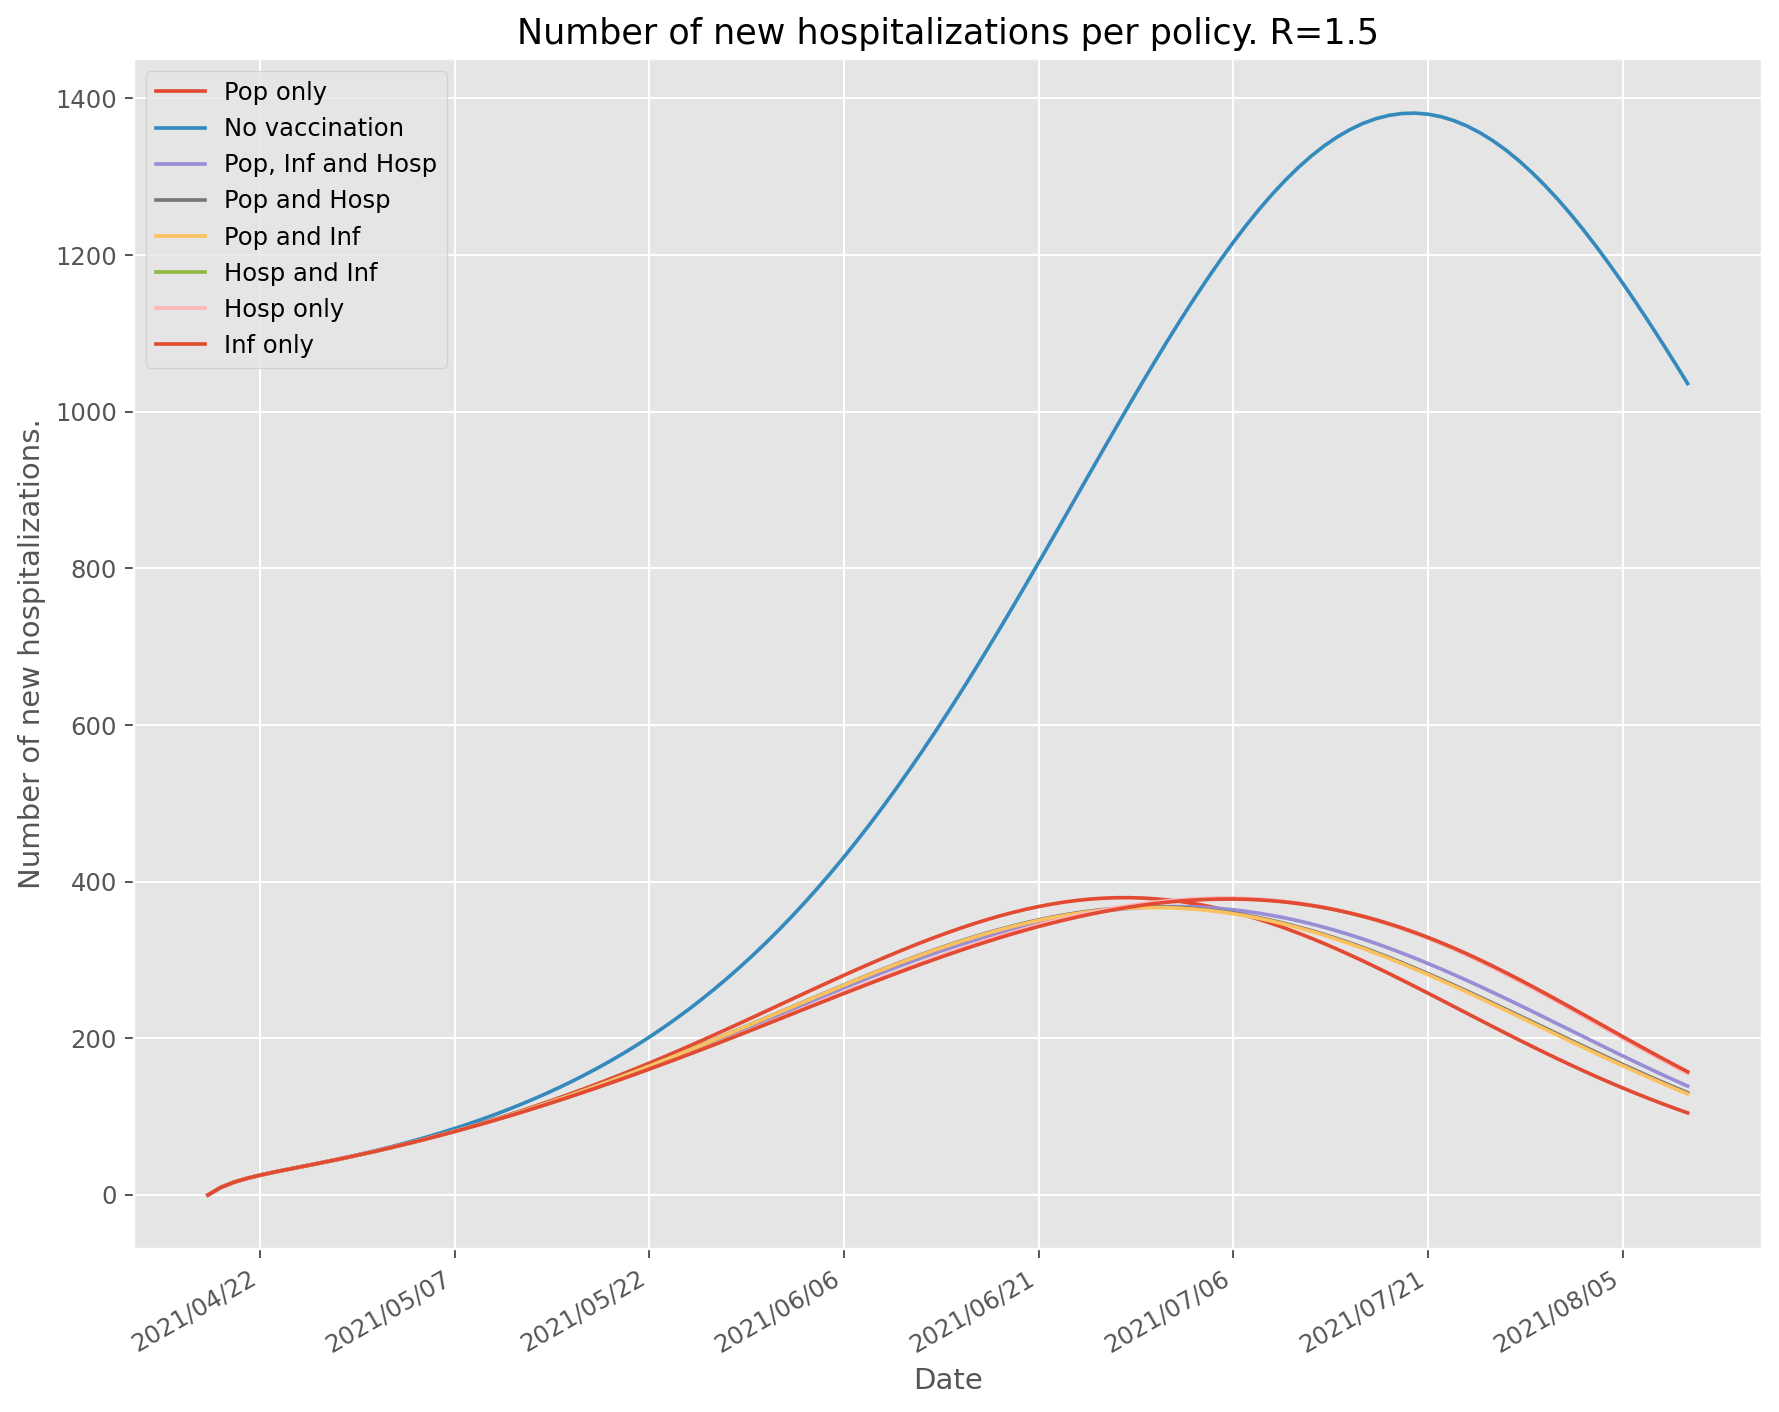

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='new hospitalizations', all_results=all_results, t0=t0, T=T, skip_no_vacc=False)

fig.autofmt_xdate()

Pop only: 77216.15149752873
Pop and Inf: 78841.73163370161
Pop and Hosp: 79003.1200908171
Pop, Inf and Hosp: 79822.52474327764
Inf only: 81981.95075530533
Hosp and Inf: 82095.32578206208
Hosp only: 82239.3462960506


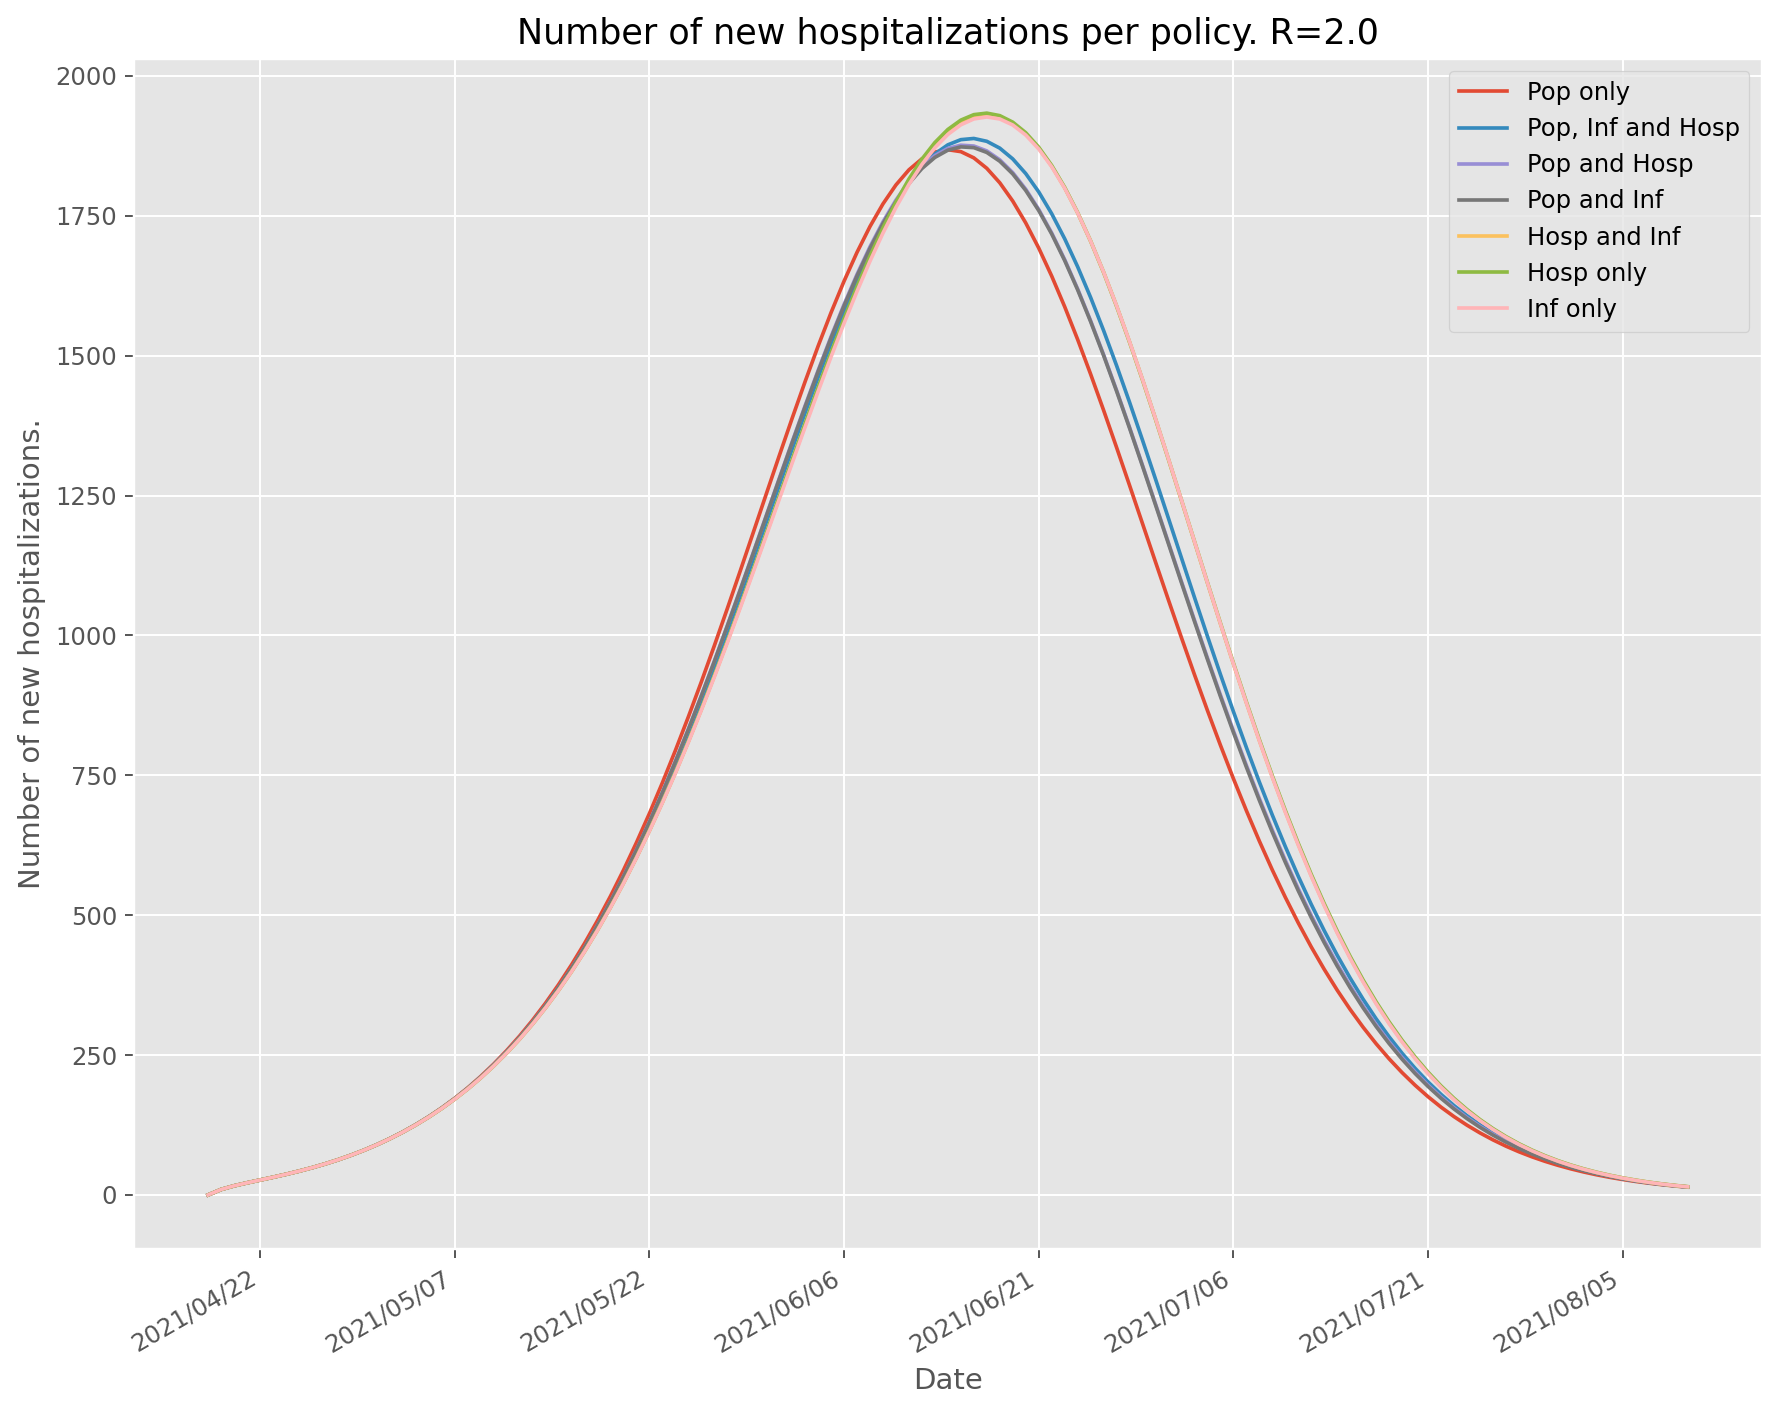

In [21]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='new hospitalizations', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

# Infections

Inf only: 230682.07647951573
Hosp and Inf: 230895.72729863762
Hosp only: 231056.064207635
Pop, Inf and Hosp: 234379.72305581684
Pop and Inf: 236140.18874384
Pop and Hosp: 236248.38940460765
Pop only: 242593.63400254142


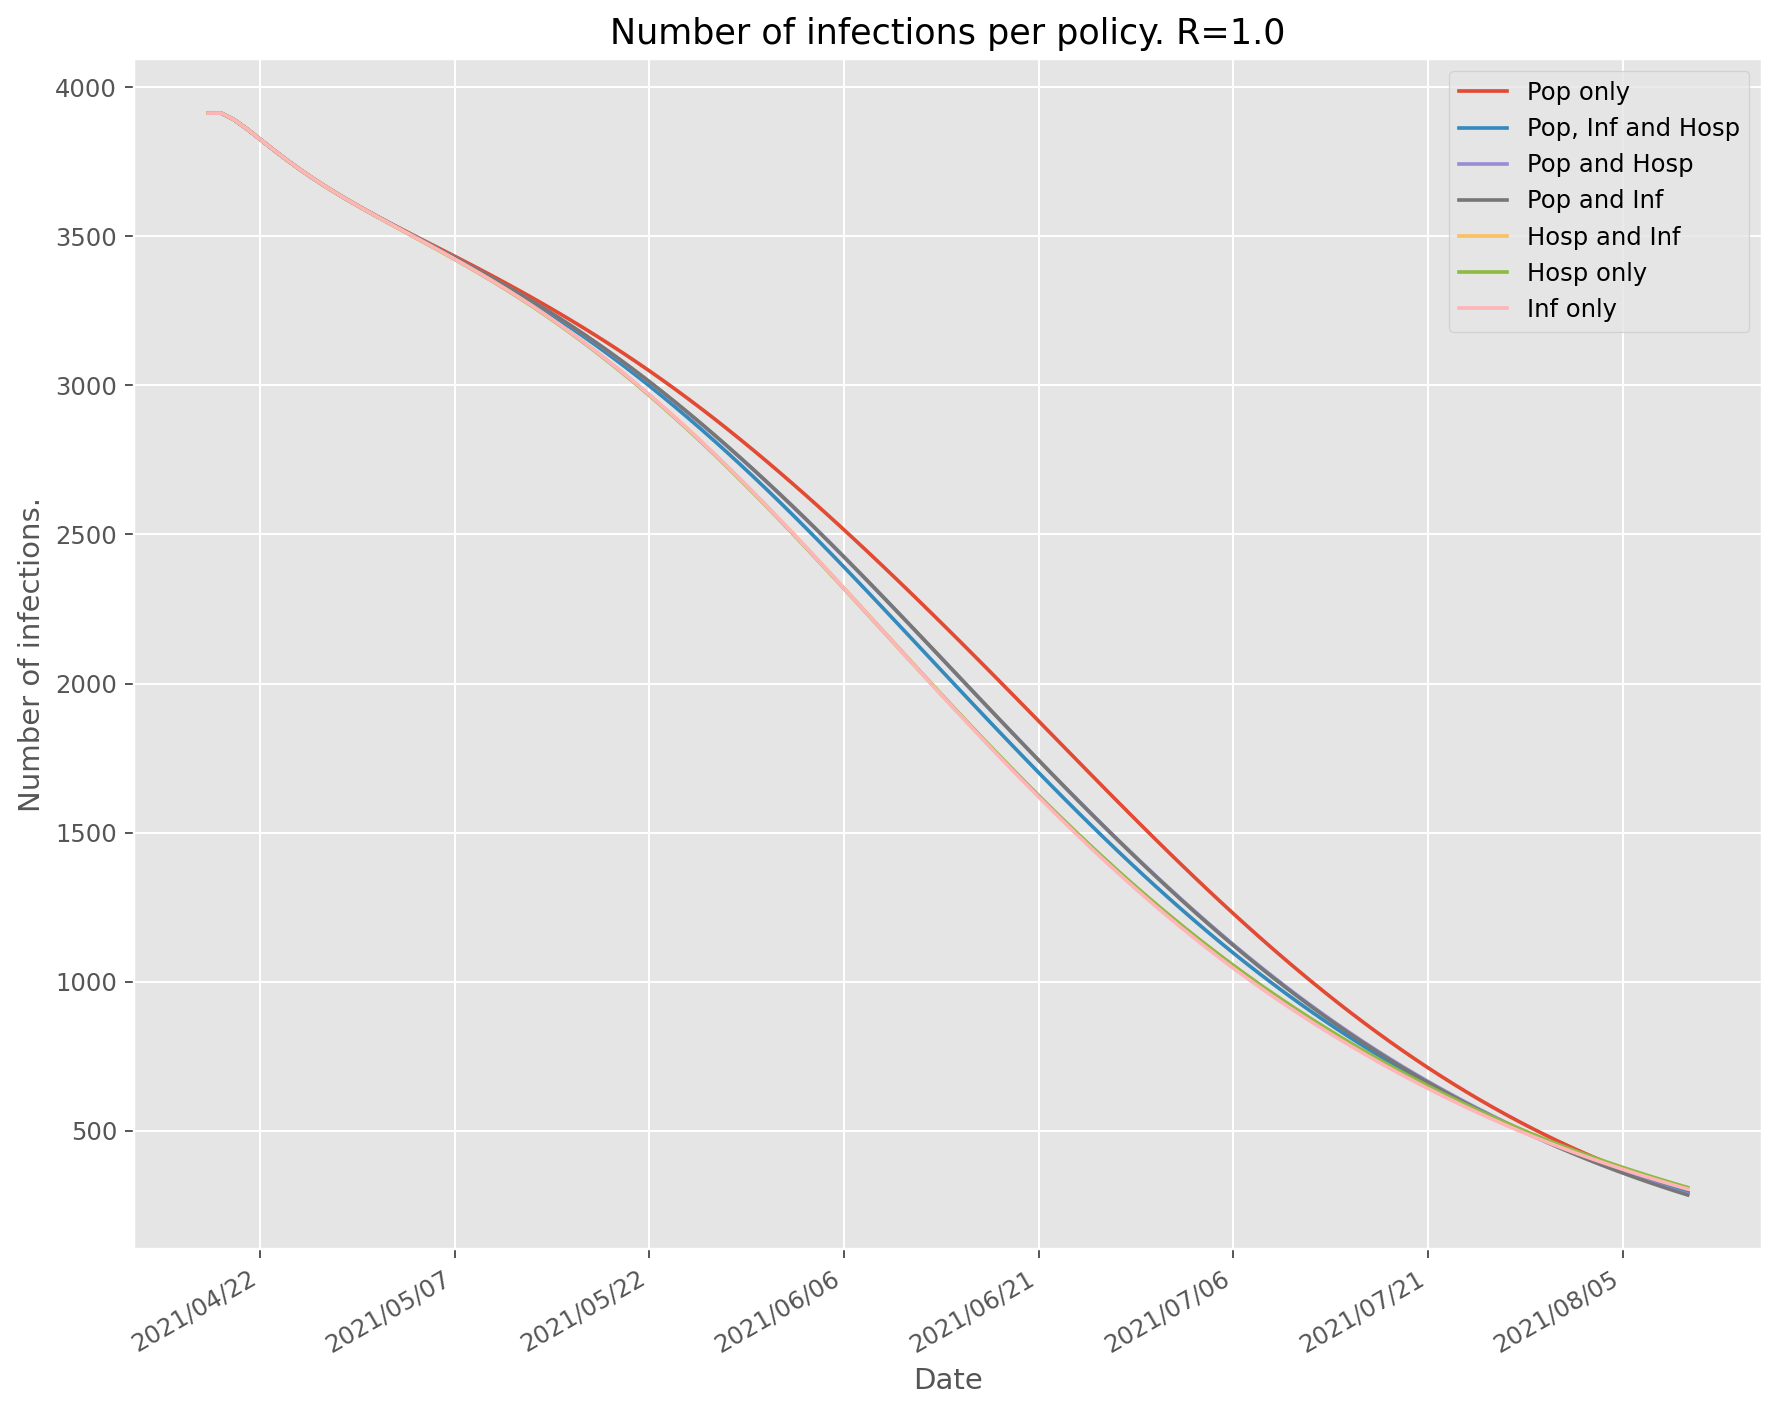

In [22]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[0], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Inf only: 979454.7321017416
Hosp and Inf: 981888.9437215683
Hosp only: 984031.2069345335
Pop, Inf and Hosp: 993941.7616969056
Pop and Inf: 999471.7595855485
Pop and Hosp: 1001332.6709287086
Pop only: 1032490.603695232


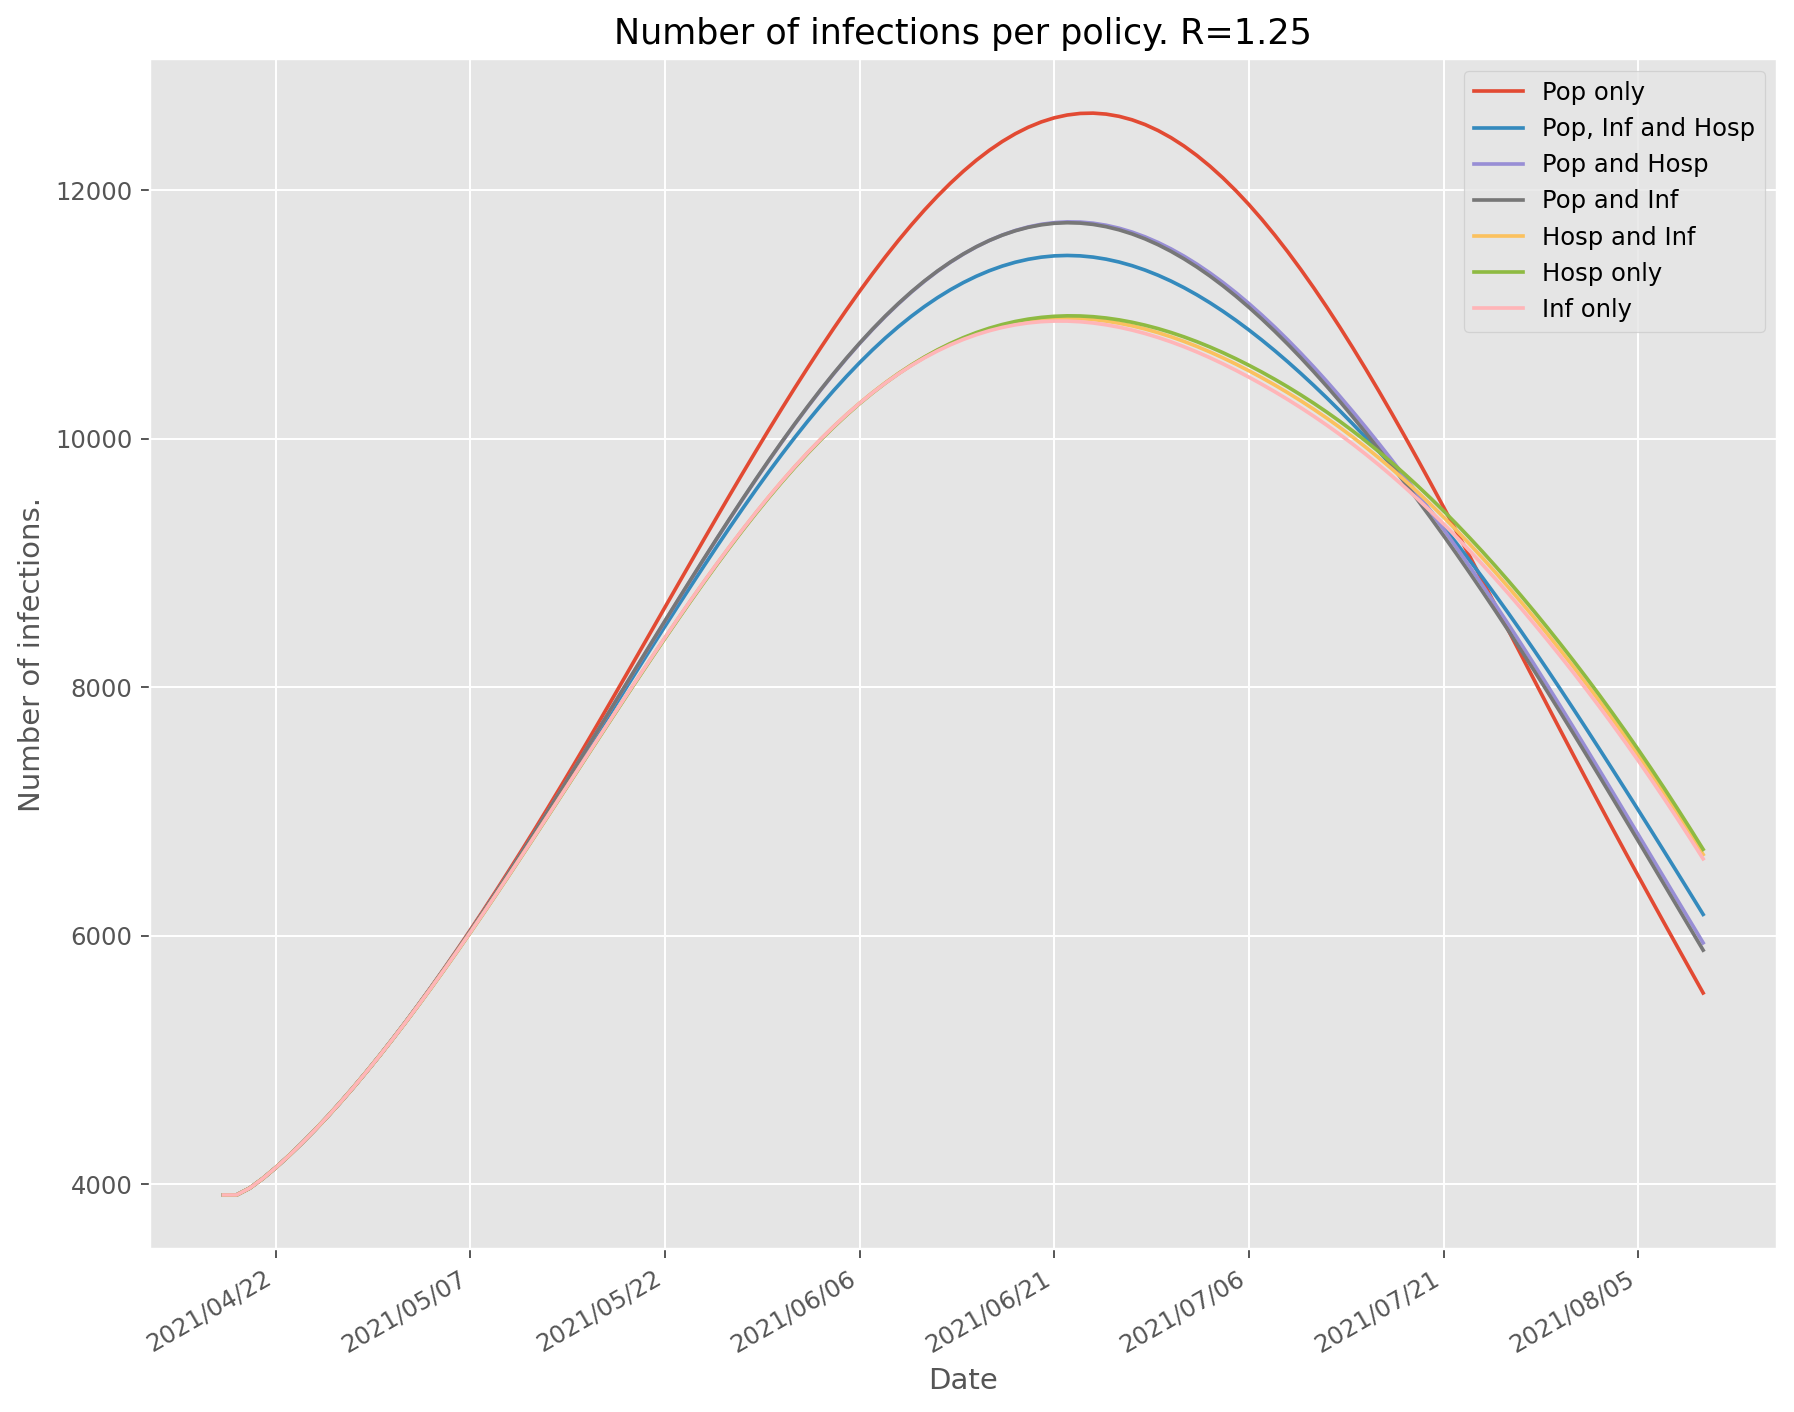

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[1], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Inf only: 3591903.630548536
Pop and Inf: 3596352.7529446133
Hosp and Inf: 3597927.4171441733
Pop, Inf and Hosp: 3602055.8006863375
Hosp only: 3603502.9393369765
Pop and Hosp: 3603583.7366861696
Pop only: 3609704.9730423894


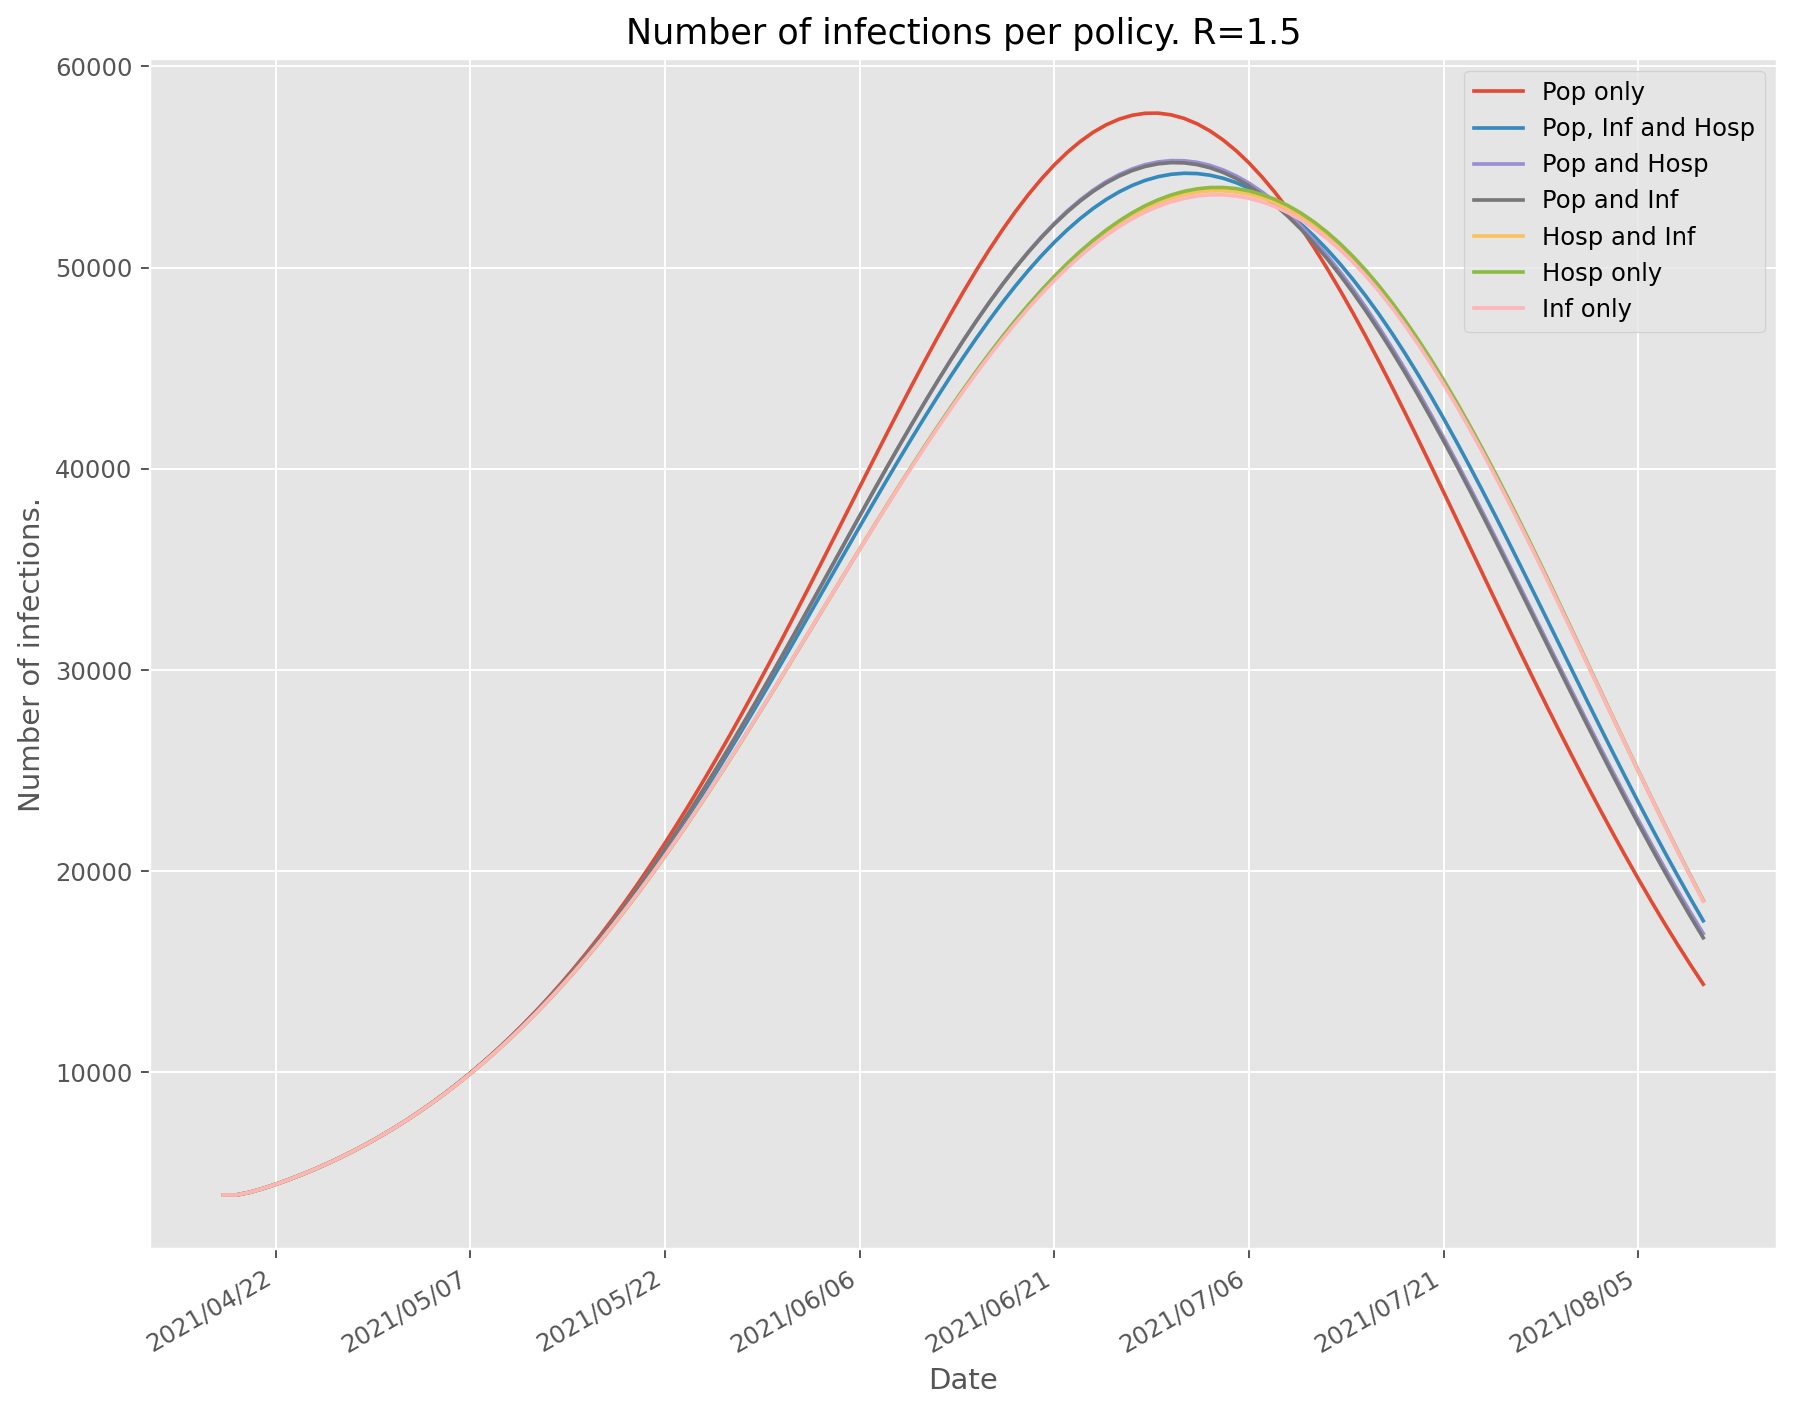

In [24]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[2], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()

Inf only: 9061418.252942096
Pop only: 9061674.63858912
Hosp and Inf: 9069294.357461177
Hosp only: 9076005.317154229
Pop and Inf: 9084870.859870994
Pop, Inf and Hosp: 9087928.788379183
Pop and Hosp: 9093192.315665152


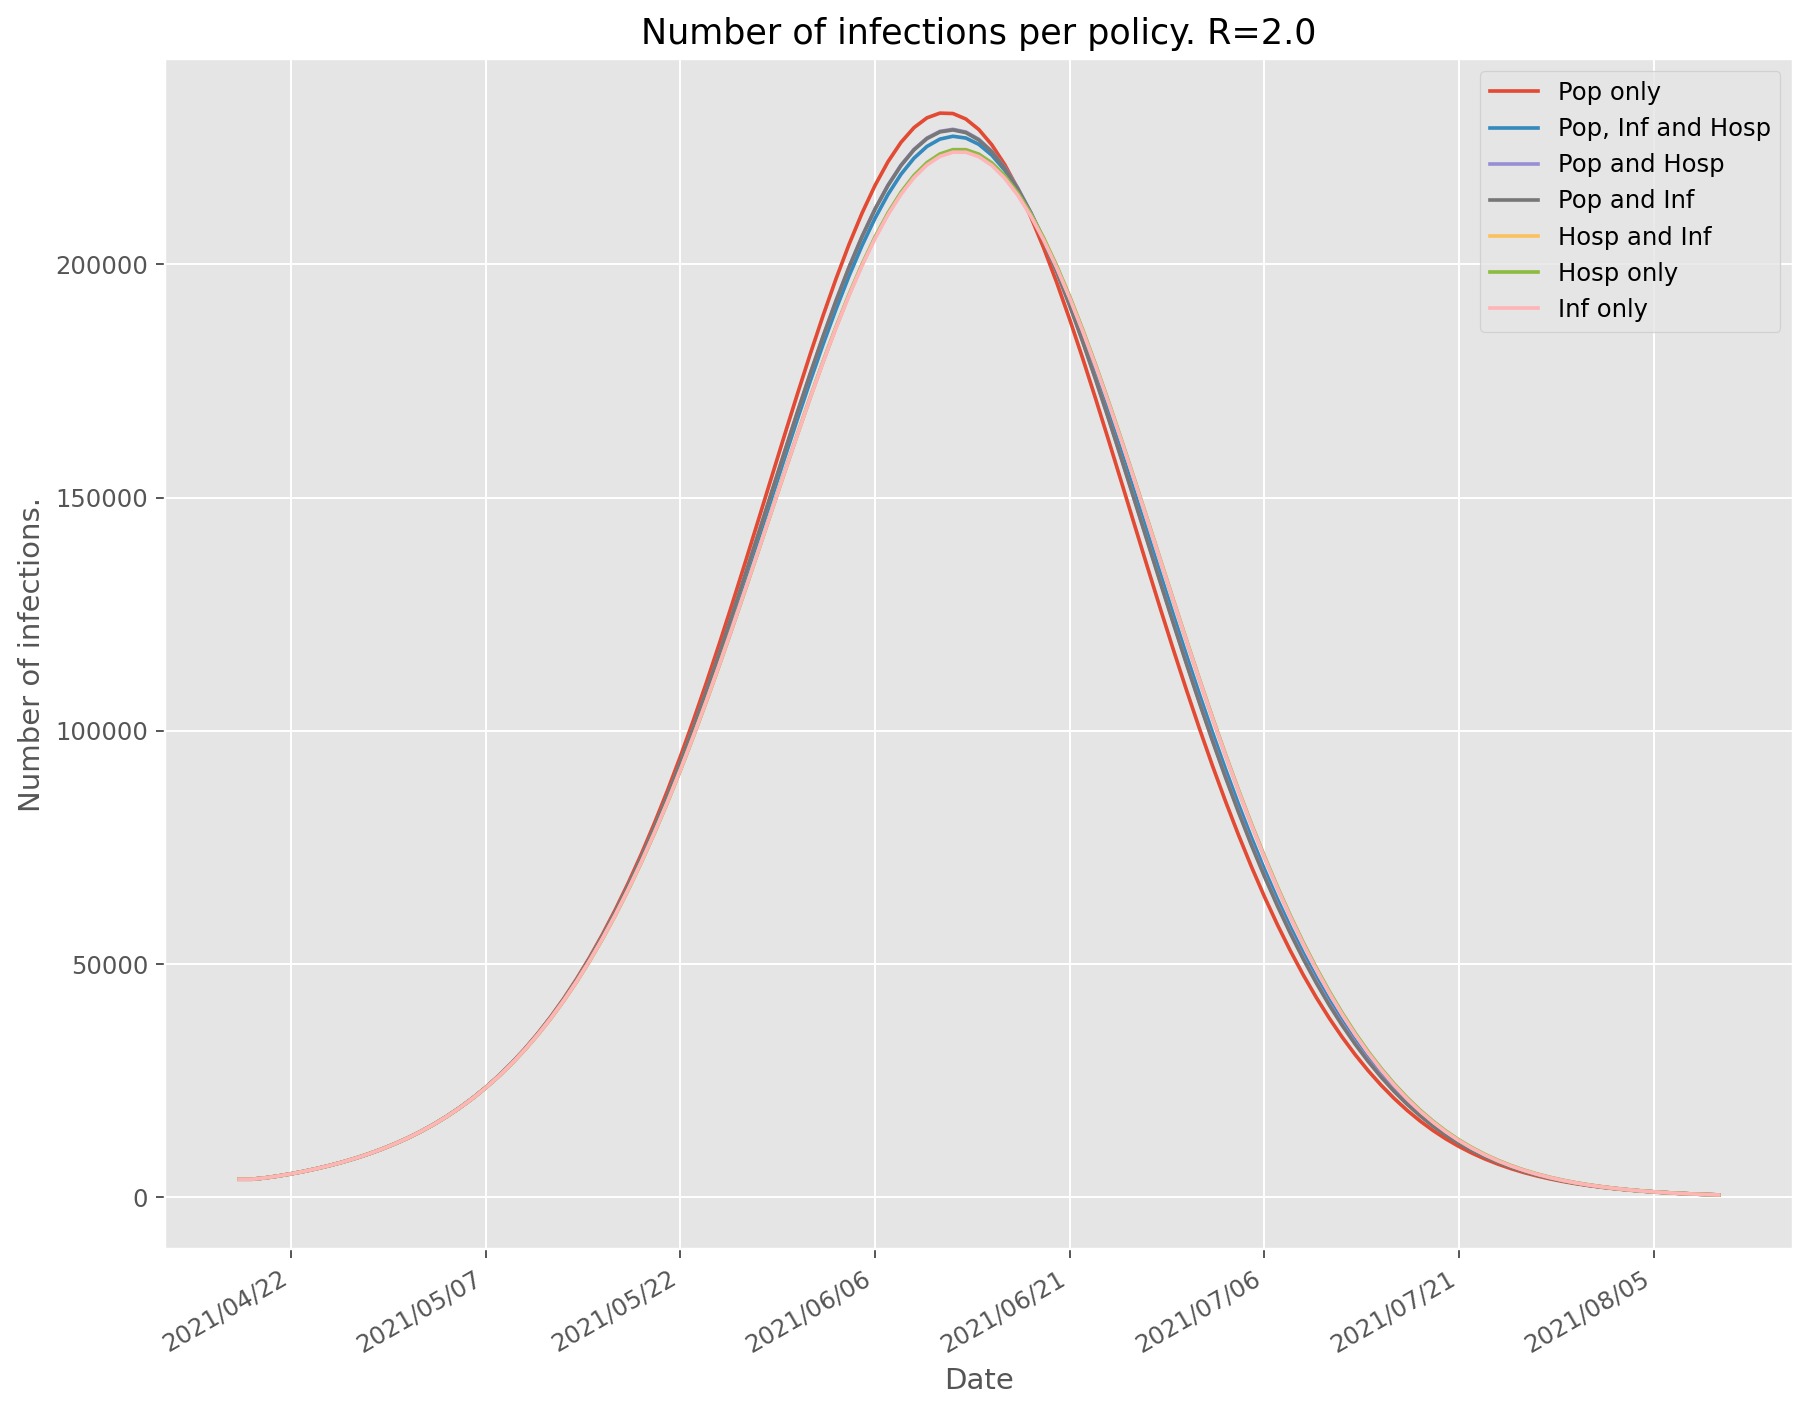

In [25]:
fig, ax = plt.subplots(figsize=(12, 10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
fig.gca().xaxis.set_major_locator(mdates.DayLocator(interval=plot_interval))

ax = plot_results(ax, r=r_experiments[3], metric='infections', all_results=all_results, t0=t0, T=T)

fig.autofmt_xdate()